In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
interest_rate=pd.read_csv('/content/gdrive/MyDrive/JPM/Interest Rate/Interest_30_UK.csv',index_col=[0])

In [4]:
interest_rate

,Date,Close,Open,High,Low,Increase
0,20220408,1.902,1.853,1.938,1.842,2.31%
1,20220407,1.859,1.816,1.896,1.783,2.03%
2,20220406,1.822,1.775,1.869,1.773,3.11%
3,20220405,1.767,1.695,1.793,1.683,5.68%
4,20220404,1.672,1.733,1.745,1.646,-4.02%
...,...,...,...,...,...,...
6994,19950109,8.568,8.568,8.568,8.568,0.94%
6995,19950106,8.488,8.488,8.488,8.488,-0.79%
6996,19950105,8.556,8.556,8.556,8.556,0.29%
6997,19950104,8.531,8.531,8.531,8.531,-0.54%


In [100]:
import os
path = "/content/gdrive/MyDrive/JPM/UK_data/UK_Speech/"
os.chdir(path)
os.listdir(path)
file_list=[i for i in os.listdir(path) if 'txt' in i]

In [101]:
speech_text=dict()
for i in range(len(file_list)):
  f=open(path+file_list[i],'r',encoding='latin1')
  f1=f.readlines()
  contents=[]
  for line in f1:
    if ('[SECTION]' not in line):
      if len(line.strip().split(' '))>=5:
        if ('Voting for the FOMC monetary policy action were' in line):
          break
        contents.append(line.strip())
  text = ' '.join(contents)
  text=text.replace('â','')
  text=text.replace('ï','')
  text=text.replace('All speeches are available online at www.bankofengland.co.uk/publications/Pages/speeches/default.aspx','')
  text=text.replace('All speeches are available online at www.bankofengland.co.uk/publications/speeches','')
  if len(text.split(' '))>100:
    speech_text[file_list[i][:8]]='speech '+text
  else:
    print(i,len(text.split(' ')),text)
  #print(text)

36 84 Page 1 Inclusive Capitalism Conference: In Conversation with Governor Mark Carney Given at Mansion House, LondonPage 2 Published on 26 June 2015 Governor Mark Carney participates in an on-stage conversation with The Economists Editor-in- Chief Zanny Minton-Beddoes at the Conference on Inclusive Capitalism: The Pathway to Action. The Governor discusses how we can create core financial markets that work fairly and effectively to deliver strong, sustainable and balanced growth. Mark Carney Former Governor, Bank of England from 2013 to 2020 Â©2022 Bank of England
308 32 Page 1 Consumption and Interest Rates - speech by Tim Besley Given at Centre for Economic Policy ResearchPage 2 Published on 19 July 2007 Consumption and Interest Rates Â©2022 Bank of England
455 29 Page 1 Interpreting Monetary Policy - speech by David Miles Speech given at Imperial College, LondonPage 2 Published on 25 February 2010 Interpreting Monetary Policy Â©2022 Bank of England
633 53 Page 1 Momentum in the ho

In [102]:
import os
path = "/content/gdrive/MyDrive/JPM/UK_data/UK_minutes/"
os.chdir(path)
os.listdir(path)
file_list=[i for i in os.listdir(path) if 'txt' in i]

In [103]:
minutes_text=dict()
for i in range(len(file_list)):
  f=open(path+file_list[i],'r',encoding='latin1')
  f1=f.readlines()
  contents=[]
  for line in f1:
    if ('[SECTION]' not in line):
      if len(line.strip().split(' '))>=5:
        if ('Voting for the FOMC monetary policy action were' in line):
          break
        contents.append(line.strip())
  text = ' '.join(contents)
  text=text.replace('â','')
  text=text.replace('ï','')
  text=text.replace('All speeches are available online at www.bankofengland.co.uk/publications/Pages/speeches/default.aspx','')
  text=text.replace('All speeches are available online at www.bankofengland.co.uk/publications/speeches','')
  if len(text.split(' '))>100:
    minutes_text[file_list[i][:8]]='minutes '+text
  else:
    print(i,len(text.split(' ')),text)
  #print(text)

8 10 Monetary policy summary and minutes Monetary Policy Committee voting history
12 1 
50 1 
55 21 The Governor invited the Committee to vote on the propositions that: The Committee voted unanimously in favour of all four propositions.


In [104]:
raw_data_speech=pd.DataFrame({'date':speech_text.keys(),'text':speech_text.values()})
raw_data_speech.sort_values(by='date',inplace=True)
raw_data_speech

,date,text
181,19970225,speech Speech by the Governor at the Queen Eli...
157,19970612,speech Lord Mayors Banquet Speech given by...
371,19970624,speech The Sixteenth Mais Lecture Speech gi...
990,19971029,speech The Inflation Target five years on L...
128,19971118,speech Developments in UK financial markets ...
...,...,...
396,20220223,speech The economy and policy trade-offs Sp...
572,20220301,speech The effectiveness of vaccination again...
26,20220330,speech Bank of England Page 1 Technica...
573,20220331,speech Page 1 The road to enhanced payments - ...


In [105]:
raw_data_statement=pd.DataFrame({'date':minutes_text.keys(),'text':minutes_text.values()})
raw_data_statement.sort_values(by='date',inplace=True)
raw_data_statement

,date,text
62,19970716,minutes I Monetary conditions 2 The 12-mon...
64,19970813,minutes I Summary of the analysis presented to...
63,19971015,minutes 1 The meeting took place against the ...
1,19971112,minutes Publication date: 12 November 1997 8 ...
0,19971210,minutes Publication date: 10 December 1997 5 ...
...,...,...
59,20210923,minutes The Bank of EnglandÂs Monetary Policy...
45,20211104,minutes The Bank of EnglandÂs Monetary Policy...
38,20211216,minutes The Bank of EnglandÂs Monetary Policy...
61,20220203,minutes The Bank of EnglandÂs Monetary Policy...


In [106]:
raw_data=raw_data_speech#pd.concat([raw_data_statement,raw_data_speech],axis=0)
raw_data.sort_values(by='date',inplace=True)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
eng_stopwords = stopwords.words('english')

# 去掉html标签
# 去掉非英文字符
# 去停用词
# 重新组合为句子
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

raw_data['clean_review'] = raw_data.text.apply(clean_text)
raw_data.head()

,date,text,clean_review
181,19970225,speech Speech by the Governor at the Queen Eli...,speech speech governor queen elizabeth confere...
157,19970612,speech Lord Mayors Banquet Speech given by...,speech lord mayor banquet speech given edward ...
371,19970624,speech The Sixteenth Mais Lecture Speech gi...,speech sixteenth mais lecture speech given edw...
990,19971029,speech The Inflation Target five years on L...,speech inflation target five years lecture del...
128,19971118,speech Developments in UK financial markets ...,speech developments uk financial markets speec...


In [95]:
raw_data

,date,text,clean_review
225,19970225,speech Speech by the Governor at the Queen Eli...,speech speech governor queen elizabeth confere...
201,19970612,speech Lord Mayors Banquet Speech given by...,speech lord mayor banquet speech given edward ...
402,19970624,speech The Sixteenth Mais Lecture Speech gi...,speech sixteenth mais lecture speech given edw...
979,19971029,speech The Inflation Target five years on L...,speech inflation target five years lecture del...
175,19971118,speech Developments in UK financial markets ...,speech developments uk financial markets speec...
...,...,...,...
864,20220222,"speech Shocks, uncertainty and the monetary po...",speech shocks uncertainty monetary policy resp...
425,20220223,speech The economy and policy trade-offs Sp...,speech economy policy trade offs speech given ...
585,20220301,speech The effectiveness of vaccination again...,speech effectiveness vaccination long covid ra...
80,20220330,speech Bank of England Page 1 Technica...,speech bank england page technical appendix re...


In [122]:
interest_rate=pd.read_csv('/content/gdrive/MyDrive/JPM/Interest Rate/Interest_3m_UK.csv',index_col=[0])

In [123]:
interest_rate

,Date,Close,Open,High,Low,Increase
0,20220408,0.672,0.672,0.672,0.672,-2.04%
1,20220407,0.686,0.681,0.686,0.681,-0.58%
2,20220406,0.690,0.690,0.690,0.690,0.44%
3,20220405,0.687,0.687,0.687,0.687,7.34%
4,20220404,0.640,0.605,0.640,0.605,3.56%
...,...,...,...,...,...,...
6067,19950110,6.500,6.500,6.500,6.500,0.00%
6068,19950109,6.500,6.500,6.500,6.500,1.09%
6069,19950105,6.430,6.430,6.430,6.430,-1.98%
6070,19950104,6.560,6.560,6.560,6.560,0.00%


In [124]:
interest_rate=interest_rate.sort_values(by='Date')
interest_rate['range']=list(range(len(interest_rate)))


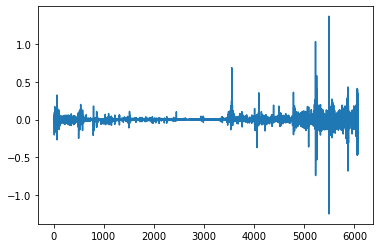

In [125]:
(interest_rate['Close']-interest_rate['Close'].shift(-1)).plot()

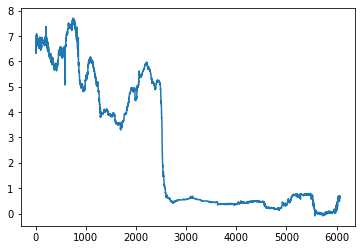

In [128]:
interest_rate.Close.plot()

In [129]:
interest_rate.index=list(range(len(interest_rate)))

In [130]:
interest_rate

,Date,Close,Open,High,Low,Increase,range
0,19950103,6.560,6.560,6.560,6.560,0.00%,0
1,19950104,6.560,6.560,6.560,6.560,0.00%,1
2,19950105,6.430,6.430,6.430,6.430,-1.98%,2
3,19950109,6.500,6.500,6.500,6.500,1.09%,3
4,19950110,6.500,6.500,6.500,6.500,0.00%,4
...,...,...,...,...,...,...,...
6067,20220404,0.640,0.605,0.640,0.605,3.56%,6067
6068,20220405,0.687,0.687,0.687,0.687,7.34%,6068
6069,20220406,0.690,0.690,0.690,0.690,0.44%,6069
6070,20220407,0.686,0.681,0.686,0.681,-0.58%,6070


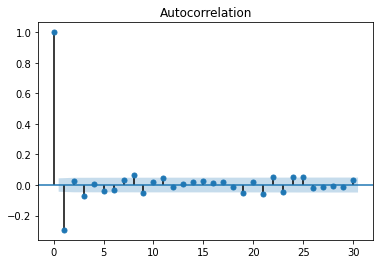

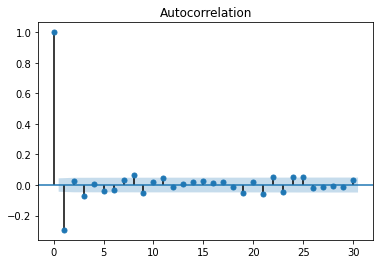

In [131]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf((interest_rate['Close']-interest_rate['Close'].shift(-1)).dropna().tail(2000),lags=30)

In [132]:
interest_rate.head(400)

,Date,Close,Open,High,Low,Increase,range
0,19950103,6.56,6.56,6.56,6.56,0.00%,0
1,19950104,6.56,6.56,6.56,6.56,0.00%,1
2,19950105,6.43,6.43,6.43,6.43,-1.98%,2
3,19950109,6.50,6.50,6.50,6.50,1.09%,3
4,19950110,6.50,6.50,6.50,6.50,0.00%,4
...,...,...,...,...,...,...,...
395,19960813,5.88,5.88,5.88,5.88,-0.34%,395
396,19960814,5.78,5.78,5.78,5.78,-1.70%,396
397,19960815,5.78,5.78,5.78,5.78,0.00%,397
398,19960816,5.78,5.78,5.78,5.78,0.00%,398


In [133]:

raw_data['change']=np.nan
for i in range(len(raw_data)):
  try:
    index=int(interest_rate[interest_rate['Date']<=int(raw_data.iloc[i,0])]['range'].tail(1))
    raw_data.iloc[i,-1]=(interest_rate.iloc[index+5,1]-interest_rate.iloc[index,1])/(1+interest_rate.iloc[index,1])
  except:
    pass

In [134]:
raw_data.date

225    19970225
201    19970612
402    19970624
979    19971029
175    19971118
         ...   
864    20220222
425    20220223
585    20220301
80     20220330
586    20220331
Name: date, Length: 983, dtype: object

In [135]:
raw_data

,date,text,clean_review,change
225,19970225,speech Speech by the Governor at the Queen Eli...,speech speech governor queen elizabeth confere...,0.025245
201,19970612,speech Lord Mayors Banquet Speech given by...,speech lord mayor banquet speech given edward ...,0.016829
402,19970624,speech The Sixteenth Mais Lecture Speech gi...,speech sixteenth mais lecture speech given edw...,0.033056
979,19971029,speech The Inflation Target five years on L...,speech inflation target five years lecture del...,0.014781
175,19971118,speech Developments in UK financial markets ...,speech developments uk financial markets speec...,0.000237
...,...,...,...,...
864,20220222,"speech Shocks, uncertainty and the monetary po...",speech shocks uncertainty monetary policy resp...,0.004972
425,20220223,speech The economy and policy trade-offs Sp...,speech economy policy trade offs speech given ...,0.061133
585,20220301,speech The effectiveness of vaccination again...,speech effectiveness vaccination long covid ra...,0.012987
80,20220330,speech Bank of England Page 1 Technica...,speech bank england page technical appendix re...,0.032376


In [136]:


new_raw=raw_data[raw_data.date>'19980101'].dropna()

In [137]:
new_raw

,date,text,clean_review,change
154,19980114,speech The Chemical Industries Association: Bu...,speech chemical industries association busines...,0.007873
60,19980122,speech The British-American Chamber of Commerc...,speech british american chamber commerce lunch...,-0.000355
891,19980224,speech Vital Topic Lecture Speech given by ...,speech vital topic lecture speech given edward...,-0.007459
624,19980306,speech Britain in Europe Speech given by E...,speech britain europe speech given edward geor...,0.000000
288,19980527,speech The UK Economy and Monetary Policy  Lo...,speech uk economy monetary policy looking ahea...,0.010259
...,...,...,...,...
864,20220222,"speech Shocks, uncertainty and the monetary po...",speech shocks uncertainty monetary policy resp...,0.004972
425,20220223,speech The economy and policy trade-offs Sp...,speech economy policy trade offs speech given ...,0.061133
585,20220301,speech The effectiveness of vaccination again...,speech effectiveness vaccination long covid ra...,0.012987
80,20220330,speech Bank of England Page 1 Technica...,speech bank england page technical appendix re...,0.032376


In [138]:

train=new_raw.head(int(0.8*len(new_raw)))
test=new_raw.tail(int(0.2*len(new_raw)))
train_label=np.array(train.change).reshape(-1,1)
test_label=np.array(test.change).reshape(-1,1)

In [139]:
best_IC=-1
alpha=0
for features in range(200,1000,100):
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for enlarge in range(1,100,10):
    clf = RidgeCV(alphas=enlarge)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print(mean_squared_error(train_predict, train_label),'train_err',mean_squared_error(test_predict, test_label),'test_err',test_label.var())
    print('train_IC',stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label]))
    print('test_IC',stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label]))
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=np.log(alpha)
  print(best_IC,features)

以词频为元素的文本-单词矩阵的维度是：

 (782, 4)
0.0002080827718160074 train_err 0.0011398489098865079 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.3705671982589845, pvalue=7.325714018228927e-27)
test_IC SpearmanrResult(correlation=-0.025306815977545336, pvalue=0.7254573079579362)
0.0002422401338321261 train_err 0.0011223449456331102 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2692419473088734, pvalue=1.87414979098764e-14)
test_IC SpearmanrResult(correlation=-0.0072869386332528995, pvalue=0.9194681538582921)
0.000248415175150729 train_err 0.0011208946188541215 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2398299130750832, pvalue=1.0804589767363481e-11)
test_IC SpearmanrResult(correlation=-0.002268468346180351, pvalue=0.9748916747354783)
0.00025137169246539385 train_err 0.0011205243982593952 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.22326144105500448, pvalue=2.7330637583923873e-10)
test_IC SpearmanrRes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002531572676597584 train_err 0.0011204413180204184 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.21313696032725546, pvalue=1.7443022671604493e-09)
test_IC SpearmanrResult(correlation=0.0012900244537322435, pvalue=0.9857199049845968)
0.00025436693447198716 train_err 0.0011204590195540336 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.20648620532466147, pvalue=5.612389473852582e-09)
test_IC SpearmanrResult(correlation=0.0037810503436869775, pvalue=0.9581619910567137)
0.00025524593697367413 train_err 0.001120515354207137 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.20207095350017154, pvalue=1.1936265590726828e-08)
test_IC SpearmanrResult(correlation=0.004650238714645842, pvalue=0.9485562610099051)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002559158878515158 train_err 0.0011205858044258318 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.1978150075101182, pvalue=2.4314152065148633e-08)
test_IC SpearmanrResult(correlation=0.0061409696078546195, pvalue=0.9320996535526624)
0.0002564445955910438 train_err 0.001120659790780828 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.19472819965861138, pvalue=4.0341387069749184e-08)
test_IC SpearmanrResult(correlation=0.00526530683562232, pvalue=0.9417633077443435)
0.0002568730939892732 train_err 0.0011207325709593813 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.1921786536206268, pvalue=6.091289860019174e-08)
test_IC SpearmanrResult(correlation=0.006133685906422004, pvalue=0.9321799961803556)
0.0061409696078546195 200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


以词频为元素的文本-单词矩阵的维度是：

 (782, 4)
0.00019451269522428145 train_err 0.0011437060468242962 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.42101669004969944, pvalue=6.058299344658771e-35)
test_IC SpearmanrResult(correlation=-0.037762754727478184, pvalue=0.6001917022659026)
0.00024003976279485194 train_err 0.0011231266457871732 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.29180193535925814, pvalue=8.159247728765395e-17)
test_IC SpearmanrResult(correlation=-0.022494497924396308, pvalue=0.7549352473887375)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002473184549115584 train_err 0.0011213780063388129 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2590499762350981, pvalue=1.859517959810636e-13)
test_IC SpearmanrResult(correlation=-0.015879278423262456, pvalue=0.8256139124997781)
0.00025067354751916887 train_err 0.0011208903404153856 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.241580984431561, pvalue=7.568570081407766e-12)
test_IC SpearmanrResult(correlation=-0.009873461941990822, pvalue=0.8910368844293934)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00025265827221653935 train_err 0.0011207429705856623 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.23050843818281452, pvalue=6.857665805696377e-11)
test_IC SpearmanrResult(correlation=-0.00791495555677625, pvalue=0.9125541456600959)
0.00025398499008228966 train_err 0.0011207192381541085 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.22221675275481595, pvalue=3.3230138797919023e-10)
test_IC SpearmanrResult(correlation=-0.0037931898460746715, pvalue=0.9580277880663034)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00025493997825350157 train_err 0.0011207461402961418 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2168945421385895, pvalue=8.860300409218955e-10)
test_IC SpearmanrResult(correlation=-0.0033294608548647747, pvalue=0.9631551459680334)
0.0002556627076144739 train_err 0.001120794305459303 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.21289364614504985, pvalue=1.8217333982575475e-09)
test_IC SpearmanrResult(correlation=-0.0010221461010438042, pvalue=0.9886849964830287)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00025622992265933973 train_err 0.0011208506504042095 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2093802320296893, pvalue=3.3912423077696077e-09)
test_IC SpearmanrResult(correlation=0.0009444532857625649, pvalue=0.9895449934062065)
0.00025668758853998613 train_err 0.0011209090043122058 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.20633694082867032, pvalue=5.758993145084791e-09)
test_IC SpearmanrResult(correlation=0.0002945852579413655, pvalue=0.9967388860770559)
0.0009444532857625649 300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


以词频为元素的文本-单词矩阵的维度是：

 (782, 4)
0.00018720973365529952 train_err 0.0011487170288597556 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.4389733143514923, pvalue=3.59054340194083e-38)
test_IC SpearmanrResult(correlation=-0.04926048208894241, pvalue=0.4940522376544658)
0.00023914455676659886 train_err 0.0011224790701635668 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2984482847246092, pvalue=1.4937388626560578e-17)
test_IC SpearmanrResult(correlation=-0.017658929473298342, pvalue=0.8064353485126193)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002468749344305575 train_err 0.0011210142867842166 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.264344648480638, pvalue=5.71520133211284e-14)
test_IC SpearmanrResult(correlation=-0.014678276987039966, pvalue=0.8386159613911592)
0.0002503856123953813 train_err 0.0011206711204993418 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.24743154517343938, pvalue=2.2575073951751293e-12)
test_IC SpearmanrResult(correlation=-0.010312911928425332, pvalue=0.8862191864005701)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002524479062026057 train_err 0.0011206032918555542 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.235186459282748, pvalue=2.739552365998395e-11)
test_IC SpearmanrResult(correlation=-0.009773108722252557, pvalue=0.8921376251230037)
0.0002538206934332802 train_err 0.0011206275129904933 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.22740079455403342, pvalue=1.2478711772944775e-10)
test_IC SpearmanrResult(correlation=-0.008101903893546734, pvalue=0.9104972249203724)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002548060073854567 train_err 0.001120685301004487 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.22204277401457595, pvalue=3.432632139699353e-10)
test_IC SpearmanrResult(correlation=-0.005716896324444523, pvalue=0.9367784967068671)
0.00025555010615868287 train_err 0.0011207543430157474 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.21753799110617206, pvalue=7.880128667889876e-10)
test_IC SpearmanrResult(correlation=-0.004422016069757202, pvalue=0.951077774500414)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000256133129781208 train_err 0.0011208253198216108 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.21391476240323776, pvalue=1.5176480724124653e-09)
test_IC SpearmanrResult(correlation=-0.0014923494935271378, pvalue=0.9834805374233984)
0.0002566029260282409 train_err 0.001120894217749771 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.21094999446886195, pvalue=2.5725275614694122e-09)
test_IC SpearmanrResult(correlation=0.0013895683733113316, pvalue=0.9846181211052754)
0.0013895683733113316 400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


以词频为元素的文本-单词矩阵的维度是：

 (782, 4)
0.00017856284863922327 train_err 0.0011430350834428938 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.48022933321177147, pvalue=2.3300903947466622e-46)
test_IC SpearmanrResult(correlation=0.0017537534449421405, pvalue=0.9805874682679411)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002373405925445307 train_err 0.0011209984865596886 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.3165845987778829, pvalue=1.1547574546201707e-19)
test_IC SpearmanrResult(correlation=0.0067714144318555105, pvalue=0.9251482410275758)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00024576328707504746 train_err 0.0011202228941574004 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.27769792158551215, pvalue=2.588937422143064e-15)
test_IC SpearmanrResult(correlation=0.005129344408880151, pvalue=0.9432645633970567)
0.00024956429967663406 train_err 0.001120156759779906 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.25855935643865485, pvalue=2.0715487531919788e-13)
test_IC SpearmanrResult(correlation=0.006161202111834109, pvalue=0.9318764831908903)
0.0002517917804817114 train_err 0.0011202347227448606 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.24756155540296146, pvalue=2.1968405572207416e-12)
test_IC SpearmanrResult(correlation=0.008302610333023267, pvalue=0.9082895917368503)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002532726793391918 train_err 0.001120347117911218 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.23964683437187706, pvalue=1.1212468170861848e-11)
test_IC SpearmanrResult(correlation=0.008611762993829866, pvalue=0.9048905049706286)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00025433476708576616 train_err 0.0011204630747657538 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.23368595697550268, pvalue=3.6849795704202836e-11)
test_IC SpearmanrResult(correlation=0.012028628265886033, pvalue=0.8674512782072302)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00025513640981890553 train_err 0.0011205728654460952 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2288168366532797, pvalue=9.50970047082514e-11)
test_IC SpearmanrResult(correlation=0.011505011062896848, pvalue=0.8731716753675283)
0.0002557642624892522 train_err 0.0011206736778292847 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.22491332909098763, pvalue=2.0024921424872665e-10)
test_IC SpearmanrResult(correlation=0.014112576175773443, pvalue=0.8447556477954089)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002562700147243122 train_err 0.0011207651771584053 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.22153692903871483, pvalue=3.7717478233449466e-10)
test_IC SpearmanrResult(correlation=0.01409800877290821, pvalue=0.8449138766228182)
0.014112576175773443 500
以词频为元素的文本-单词矩阵的维度是：

 (782, 4)
0.0001731575280885082 train_err 0.0011421760747909904 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.49138754462913053, pvalue=8.991416693698575e-49)
test_IC SpearmanrResult(correlation=0.021675486163306574, pvalue=0.7635891080265308)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00023659415645281727 train_err 0.0011199135989364423 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.3210099170441643, pvalue=3.346855424464854e-20)
test_IC SpearmanrResult(correlation=0.0178547801118198, pvalue=0.8043315622486557)
0.00024539157555811096 train_err 0.0011195477578012762 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.28139848114614924, pvalue=1.0651435130858566e-15)
test_IC SpearmanrResult(correlation=0.012335353026215093, pvalue=0.8641035570391574)
0.000249325509973989 train_err 0.0011196731495623372 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.26126655149023253, pvalue=1.1384241451637869e-13)
test_IC SpearmanrResult(correlation=0.009151566200002641, pvalue=0.8989596298842593)
0.00025161908264625943 train_err 0.001119860559270193 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.24944804676004878, pvalue=1.476954979852862e-12)
test_IC SpearmanrResult(correlation=0.011069607577258

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00023573608634383386 train_err 0.001119447832689712 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.33359379769400427, pvalue=8.823097776652882e-22)
test_IC SpearmanrResult(correlation=0.0171652563761988, pvalue=0.8117444185232794)
0.0002449078944736233 train_err 0.0011194167319271463 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2936198945814555, pvalue=5.1508042097107374e-17)
test_IC SpearmanrResult(correlation=0.009876699142627543, pvalue=0.8910013801222236)
0.0002489870575722022 train_err 0.001119638577885053 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.27272405755163037, pvalue=8.364286699648471e-15)
test_IC SpearmanrResult(correlation=0.010487720762808121, pvalue=0.884303903331672)
0.0002513585612921365 train_err 0.001119865450892901 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2598517394549458, pvalue=1.5579497420845243e-13)
test_IC SpearmanrResult(correlation=0.008248387222358235, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00023559290942824215 train_err 0.001119827109364466 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.3391018107264901, pvalue=1.7022815052501866e-22)
test_IC SpearmanrResult(correlation=0.01243489694579418, pvalue=0.863017610481477)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00024491969146545793 train_err 0.0011196833350639917 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2985650403873833, pvalue=1.449266520538589e-17)
test_IC SpearmanrResult(correlation=0.005755742732085143, pvalue=0.9363498078029182)
0.00024903710083662656 train_err 0.0011198525202250767 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.27757274375011687, pvalue=2.6672726213169472e-15)
test_IC SpearmanrResult(correlation=0.003228298334967328, pvalue=0.9642738877570303)
0.0002514198046307663 train_err 0.0011200469885431353 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.2640600392940756, pvalue=6.093503504281114e-14)
test_IC SpearmanrResult(correlation=0.005240218530687753, pvalue=0.9420403098695582)
0.00025299072321645095 train_err 0.0011202259150724044 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.25509810707651825, pvalue=4.4089691452434886e-13)
test_IC SpearmanrResult(correlation=0.003487274385

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0002351763573290973 train_err 0.0011199057831908549 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.3467070200516675, pvalue=1.6613148030752002e-23)
test_IC SpearmanrResult(correlation=0.015062694562650263, pvalue=0.8344493169395941)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00024475577113217345 train_err 0.001119674223535589 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.30526838690008523, pvalue=2.4969473424013943e-18)
test_IC SpearmanrResult(correlation=0.010736985211835432, pvalue=0.881574014151883)
0.00024895559183807874 train_err 0.0011198306586550888 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.28299617105787317, pvalue=7.228993286748028e-16)
test_IC SpearmanrResult(correlation=0.00740104995569722, pvalue=0.918211406836458)
0.00025137531425315976 train_err 0.0011200244949577257 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.26980122475693724, pvalue=1.6476709179292716e-14)
test_IC SpearmanrResult(correlation=0.005890086558508952, pvalue=0.9348674005898323)
0.0002529657108135168 train_err 0.001120205388872654 test_err 0.0011040176055214764
train_IC SpearmanrResult(correlation=0.26073360745224183, pvalue=1.2815165413098025e-13)
test_IC SpearmanrResult(correlation=0.00321292163194

In [140]:
raw_data=raw_data_statement#pd.concat([raw_data_statement,raw_data_speech],axis=0)
raw_data.sort_values(by='date',inplace=True)
eng_stopwords = stopwords.words('english')
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

raw_data['clean_review'] = raw_data.text.apply(clean_text)
raw_data.head()
raw_data['change']=np.nan
for i in range(len(raw_data)):
  try:
    index=int(interest_rate[interest_rate['Date']<=int(raw_data.iloc[i,0])]['range'].tail(1))
    raw_data.iloc[i,-1]=(interest_rate.iloc[index+30,1]-interest_rate.iloc[index,1])/(1+interest_rate.iloc[index,1])
  except:
    pass
new_raw=raw_data[raw_data.date>'19980101'].dropna()
train=new_raw.head(int(0.6*len(new_raw)))
test=new_raw.tail(int(0.4*len(new_raw)))
train_label=np.array(train.change).reshape(-1,1)
test_label=np.array(test.change).reshape(-1,1)

In [141]:
test_label.shape

(106, 1)

In [142]:
best_IC=-1
alpha=0
for features in range(200,1000,100):
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for enlarge in range(1,100,10):
    clf = RidgeCV(alphas=enlarge)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print(mean_squared_error(train_predict, train_label),'train_err',mean_squared_error(test_predict, test_label),'test_err',test_label.var())
    print('train_IC',stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label]))
    print('test_IC',stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label]))
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=np.log(alpha)
  print(best_IC,features)

以词频为元素的文本-单词矩阵的维度是：

 (159, 4)
0.0028533916695154516 train_err 0.0016324809991012039 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.6288167041651785, pvalue=7.004110066241031e-19)
test_IC SpearmanrResult(correlation=0.19688839851263804, pvalue=0.04308329303576805)
0.004327950413280841 train_err 0.001564922439032129 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.439521612383254, pvalue=6.785291565784775e-09)
test_IC SpearmanrResult(correlation=0.21286961604845234, pvalue=0.028465153937762982)
0.004511239770932594 train_err 0.0015640238068964985 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.41318999219720576, pvalue=6.202344542157704e-08)
test_IC SpearmanrResult(correlation=0.22061839050308107, pvalue=0.023053219102167927)
0.004585372896833325 train_err 0.0015637442258075803 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.39934797893273727, pvalue=1.8435012940738952e-07)
test_IC SpearmanrResult(co

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00462562300488068 train_err 0.0015636358119651402 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.3917365882678472, pvalue=3.2868166540420847e-07)
test_IC SpearmanrResult(correlation=0.22409475875645812, pvalue=0.020927350531998852)
0.0046509240126370146 train_err 0.001563589736942348 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.38846155568915164, pvalue=4.1967165321061624e-07)
test_IC SpearmanrResult(correlation=0.22630149686512352, pvalue=0.01966711720007057)
0.004668306924565433 train_err 0.0015635700675073576 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.385277579166655, pvalue=5.308814065932148e-07)
test_IC SpearmanrResult(correlation=0.22854854069266864, pvalue=0.018451535186030033)
0.00468098834549927 train_err 0.0015635626932446218 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.38259814275883436, pvalue=6.457704899781175e-07)
test_IC SpearmanrResult(correlation=0.22951587794578224, p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004698255039256782 train_err 0.0015635631461471426 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.38116363669314307, pvalue=7.166688273045629e-07)
test_IC SpearmanrResult(correlation=0.2294654957971826, pvalue=0.01797443186344488)
0.22951587794578224 200
以词频为元素的文本-单词矩阵的维度是：

 (159, 4)
0.0027289508419815166 train_err 0.0015874278359603465 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.6571127468095509, pvalue=5.136316934695128e-21)
test_IC SpearmanrResult(correlation=0.1938453167372181, pvalue=0.0464782528582406)
0.004310385391811384 train_err 0.0015685233300781055 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.45781044517914193, pvalue=1.3009265980955624e-09)
test_IC SpearmanrResult(correlation=0.19914551876990308, pvalue=0.04070079086778298)
0.004501993523679445 train_err 0.0015666180748879989 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4328028696135599, pvalue=1.2151305874884498e-08)
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


 SpearmanrResult(correlation=0.19852078012726723, pvalue=0.04134894893102132)
0.004647109689580648 train_err 0.0015648654519695325 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4125406580259512, pvalue=6.534769373102516e-08)
test_IC SpearmanrResult(correlation=0.20090889397089143, pvalue=0.038916941318068214)
0.004665116938570249 train_err 0.00156465681451982 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.40937011600354944, pvalue=8.418921610792704e-08)
test_IC SpearmanrResult(correlation=0.2004756074929343, pvalue=0.03934907821569693)
0.004678246973149857 train_err 0.001564508792959443 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.40634436803772633, pvalue=1.069549101007032e-07)
test_IC SpearmanrResult(correlation=0.19828902224370876, pvalue=0.041591575143081004)
0.0046882460678714 train_err 0.0015643988529895996 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.40445458169104054, pvalue=1.24051

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004696115344266077 train_err 0.0015643142461584719 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4042664986897117, pvalue=1.2588931693081245e-07)
test_IC SpearmanrResult(correlation=0.2012313397219293, pvalue=0.03859793559675481)
0.2012313397219293 300
以词频为元素的文本-单词矩阵的维度是：

 (159, 4)
0.002607008078249562 train_err 0.0014950876939577118 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.6757911801081917, pvalue=1.483561447648285e-22)
test_IC SpearmanrResult(correlation=0.21003813929715104, pvalue=0.030695211150523576)
0.004272687883991316 train_err 0.0015504203570182536 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4797400275007539, pvalue=1.5719753103472428e-10)
test_IC SpearmanrResult(correlation=0.2082949169556026, pvalue=0.03214037016788935)
0.004479517238201525 train_err 0.0015567211616101593 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4570312441736364, pvalue=1.3985736670840896e-09)
test_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004681655054602176 train_err 0.0015617539252271997 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4281784161364411, pvalue=1.8014715336563e-08)
test_IC SpearmanrResult(correlation=0.21652736003678816, pvalue=0.02578921362236441)
0.004690218271399954 train_err 0.0015619574707208012 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4274783294092723, pvalue=1.911141180041302e-08)
test_IC SpearmanrResult(correlation=0.2173334744143828, pvalue=0.025229216810128775)
0.2173334744143828 400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


以词频为元素的文本-单词矩阵的维度是：

 (159, 4)
0.002510791651592029 train_err 0.0015016364265847237 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.6978969036532703, pvalue=1.5736061889458846e-24)
test_IC SpearmanrResult(correlation=0.21051173149398794, pvalue=0.030312230438179138)
0.004253275452154532 train_err 0.0015508637560177358 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.5004799102028488, pvalue=1.847413041935538e-11)
test_IC SpearmanrResult(correlation=0.21100547655026464, pvalue=0.029917268114098308)
0.004468998319699188 train_err 0.0015571637842235247 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.47451699240829454, pvalue=2.636132147541795e-10)
test_IC SpearmanrResult(correlation=0.20894988488739827, pvalue=0.031590791652020625)
0.004555882703844576 train_err 0.0015592610459850866 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4630319875493685, pvalue=7.972019409567582e-10)
test_IC SpearmanrResult(c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004678875922483076 train_err 0.0015619402699810602 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4445670135300138, pvalue=4.344019690408195e-09)
test_IC SpearmanrResult(correlation=0.21595300354275196, pvalue=0.026194643945979344)
0.0046877433153064245 train_err 0.001562126351477556 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.44305040774152027, pvalue=4.97097574422507e-09)
test_IC SpearmanrResult(correlation=0.21731332155494296, pvalue=0.025243089280068177)
0.21731332155494296 500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


以词频为元素的文本-单词矩阵的维度是：

 (159, 4)
0.002431031415873636 train_err 0.0015763749034630218 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.7161499111155719, pvalue=2.6657025846842475e-26)
test_IC SpearmanrResult(correlation=0.22558607035500822, pvalue=0.02006833311044993)
0.004231276361893366 train_err 0.0015646327564407853 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.5237186099225992, pvalue=1.4046454532806188e-12)
test_IC SpearmanrResult(correlation=0.2039519757463113, pvalue=0.03599252013467818)
0.004455891334788705 train_err 0.0015637635308560227 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4931401949843228, pvalue=4.0067856754956805e-11)
test_IC SpearmanrResult(correlation=0.21094501797194504, pvalue=0.02996539539397605)
0.004546532189643727 train_err 0.0015634808532916996 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.48216122296230546, pvalue=1.2333198267558379e-10)
test_IC SpearmanrResult(co

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


以词频为元素的文本-单词矩阵的维度是：

 (159, 4)
0.0024032648831886234 train_err 0.001564147434732661 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.7204788055906024, pvalue=9.665221760411846e-27)
test_IC SpearmanrResult(correlation=0.22263367644706777, pvalue=0.021799391202942126)
0.004226557004626818 train_err 0.0015666253113412246 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.527122016613313, pvalue=9.47210736011368e-13)
test_IC SpearmanrResult(correlation=0.19715038568535628, pvalue=0.04280092755229639)
0.004453188260125457 train_err 0.0015651649754651273 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.49932752863915086, pvalue=2.0887427434194835e-11)
test_IC SpearmanrResult(correlation=0.20643077745741492, pvalue=0.03374893455982387)
0.004544618070131139 train_err 0.0015645216840846205 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.4887724897312401, pvalue=6.296848282391817e-11)
test_IC SpearmanrResult(corre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


以词频为元素的文本-单词矩阵的维度是：

 (159, 4)
0.002363861433062724 train_err 0.0015714109859248885 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.7274931073623848, pvalue=1.792203563343708e-27)
test_IC SpearmanrResult(correlation=0.21208365453029754, pvalue=0.029069932834536592)
0.0042174982753614846 train_err 0.001569693411246857 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.533310842990374, pvalue=4.574484782808169e-13)
test_IC SpearmanrResult(correlation=0.20342800140087478, pvalue=0.036482482349320895)
0.004447923832810311 train_err 0.0015669976767326242 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.5056954816841441, pvalue=1.0537340174798082e-11)
test_IC SpearmanrResult(correlation=0.205362675907102, pvalue=0.034700798947532016)
0.004540898123345887 train_err 0.0015658255467204613 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.49447170321595285, pvalue=3.486514583034288e-11)
test_IC SpearmanrResult(corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0046822406508895435 train_err 0.001564273340024448 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.48032517461599933, pvalue=1.482707972939711e-10)
test_IC SpearmanrResult(correlation=0.21077371866670616, pvalue=0.030102112311508115)
0.21213403667889721 800
以词频为元素的文本-单词矩阵的维度是：

 (159, 4)
0.0023120172866341656 train_err 0.0015581656750946536 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.7343357460773987, pvalue=3.2900667713596234e-28)
test_IC SpearmanrResult(correlation=0.22327856794914352, pvalue=0.02141072194781038)
0.0042042041730452695 train_err 0.0015681315739194562 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.5432867056719703, pvalue=1.371066659282391e-13)
test_IC SpearmanrResult(correlation=0.20761979616436704, pvalue=0.032715288154533714)
0.004440205691879916 train_err 0.0015661414102926935 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.5121783743410607, pvalue=5.174107079958237e-12)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004680275205319523 train_err 0.0015640658092930988 test_err 0.0015114941716672054
train_IC SpearmanrResult(correlation=0.48617515304622166, pvalue=8.21420073320817e-11)
test_IC SpearmanrResult(correlation=0.20990714571079191, pvalue=0.03080186208910328)
0.22327856794914352 900


In [159]:
raw_data

,date,text,clean_review,change
130,19970716,minutes I Monetary conditions 2 The 12-mon...,minutes monetary conditions month growth rate ...,0.031742
44,19970813,minutes I Summary of the analysis presented to...,minutes summary analysis presented monetary po...,0.008189
132,19971015,minutes 1 The meeting took place against the ...,minutes meeting took place background earlier ...,0.023815
77,19971112,minutes Publication date: 12 November 1997 8 ...,minutes publication date november october minu...,0.015037
60,19971210,minutes Publication date: 10 December 1997 5 ...,minutes publication date december november min...,0.001067
...,...,...,...,...
268,20210923,minutes The Bank of EnglandÂs Monetary Policy...,minutes bank england monetary policy committee...,0.015238
254,20211104,minutes The Bank of EnglandÂs Monetary Policy...,minutes bank england monetary policy committee...,-0.069726
247,20211216,minutes The Bank of EnglandÂs Monetary Policy...,minutes bank england monetary policy committee...,-0.013344
270,20220203,minutes The Bank of EnglandÂs Monetary Policy...,minutes bank england monetary policy committee...,0.128946


In [171]:
raw_data=raw_data_statement
raw_data.sort_values(by='date',inplace=True)
eng_stopwords = stopwords.words('english')
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

raw_data['clean_review'] = raw_data.text.apply(clean_text)
raw_data.head()
raw_data['change']=np.nan
for i in range(len(raw_data)):
  try:
    index=int(interest_rate[interest_rate['Date']<=int(raw_data.iloc[i,0])]['range'].tail(1))
    raw_data.iloc[i,-1]=(interest_rate.iloc[index+30,1]-interest_rate.iloc[index,1])/(1+interest_rate.iloc[index,1])
  except:
    pass


In [174]:
raw_data

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>

In [181]:
US_raw=pd.read_csv('/content/gdrive/MyDrive/JPM/Baseline_Model/US_3m.csv',index_col=[0])
US_statement=US_raw[US_raw['type']=='statement']

In [188]:
US_statement.date=US_statement.date.apply(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [182]:
interest_rate=pd.read_csv('/content/gdrive/MyDrive/JPM/Interest Rate/Interest_10_UK.csv',index_col=[0])
interest_rate=interest_rate.sort_values(by='Date')
interest_rate['range']=list(range(len(interest_rate)))
raw_data['change']=np.nan
for i in range(len(raw_data)):
  try:
    index=int(interest_rate[interest_rate['Date']<=int(raw_data.iloc[i,0])]['range'].tail(1))
    raw_data.iloc[i,-1]=(interest_rate.iloc[index+10,1]-interest_rate.iloc[index,1])/(1+interest_rate.iloc[index,1])
  except:
    pass
new_raw=raw_data[raw_data.date>'19980101'].dropna()
# train=new_raw.head(int(0.8*len(new_raw)))
# test=new_raw.tail(int(0.2*len(new_raw)))
# train_label=np.array(train.change).reshape(-1,1)
# test_label=np.array(test.change).reshape(-1,1)

In [190]:
new_=pd.concat([new_raw,US_statement],axis=0).sort_values(by='date')

In [193]:
train=new_.head(int(0.7*len(new_)))
test=new_.tail(int(0.3*len(new_)))
train_label=np.array(train.change).reshape(-1,1)
test_label=np.array(test.change).reshape(-1,1)
test_label.shape

(141, 1)

In [194]:
best_IC=-1
alpha=0
for features in range(400,4000,100):
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for enlarge in range(1,100,10):
    clf = RidgeCV(alphas=enlarge)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print(mean_squared_error(train_predict, train_label),'train_err',mean_squared_error(test_predict, test_label),'test_err',test_label.var())
    print('train_IC',stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label]))
    print('test_IC',stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label]))
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=np.log(alpha)
  print(best_IC,features)

以词频为元素的文本-单词矩阵的维度是：

 (329, 5)
0.0032482718268852973 train_err 0.0046647741141282026 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.42757870048996155, pvalue=4.690783347185809e-16)
test_IC SpearmanrResult(correlation=0.08568022107177697, pvalue=0.3124000409946587)
0.004713218435570603 train_err 0.0045929160814125024 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28845220684867806, pvalue=1.0053074219407272e-07)
test_IC SpearmanrResult(correlation=-0.050608011062257, pvalue=0.5511955315762763)
0.0049205395798722395 train_err 0.004610924370044306 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.26090417107542174, pvalue=1.6048853603156512e-06)
test_IC SpearmanrResult(correlation=-0.07186538778514641, pvalue=0.39707669676024526)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00501072392521027 train_err 0.00461945999513456 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.23221480128589628, pvalue=2.097422783570486e-05)
test_IC SpearmanrResult(correlation=-0.08234317039098102, pvalue=0.3316892733832323)
0.005062153703047015 train_err 0.004623990150458672 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2102221338599128, pvalue=0.00012224196554929247)
test_IC SpearmanrResult(correlation=-0.08352044933545683, pvalue=0.32479905115458063)
0.00509574347084069 train_err 0.004626627561652669 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.19318367154381688, pvalue=0.0004251645230855605)
test_IC SpearmanrResult(correlation=-0.08389931910486087, pvalue=0.3226013948087152)
0.005119562829955404 train_err 0.004628271208685866 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.18083724785852445, pvalue=0.00098487661213941)
test_IC SpearmanrResult(correlation=-0.08568450208612054, pvalue=0.312375

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.005005186724940069 train_err 0.004594229618887707 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.21799142735831892, pvalue=6.691145470869258e-05)
test_IC SpearmanrResult(correlation=-0.03538472405659901, pvalue=0.676999819095376)
0.005057461188310061 train_err 0.004603102111906301 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.19212287453076246, pvalue=0.0004579299292079254)
test_IC SpearmanrResult(correlation=-0.04305844226740946, pvalue=0.6121726486496935)
0.0050916700306203235 train_err 0.00460881109589441 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.1782833150243633, pvalue=0.0011641789683153154)
test_IC SpearmanrResult(correlation=-0.05154127218915054, pvalue=0.5438679192081097)
0.005115963635916009 train_err 0.004612742931159179 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.17154280592267102, pvalue=0.001791136879317921)
test_IC SpearmanrResult(correlation=-0.05180455457127876, pvalue=0.54180

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.005003789125661882 train_err 0.004584673660282198 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.21517094737125875, pvalue=8.348396822301084e-05)
test_IC SpearmanrResult(correlation=-0.02240896958130392, pvalue=0.7919677508319187)
0.005056510201095751 train_err 0.004595812220683291 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.19158910627514675, pvalue=0.000475289636875155)
test_IC SpearmanrResult(correlation=-0.03278828885723693, pvalue=0.6995133901644192)
0.005090943252247753 train_err 0.0046029309542046865 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.17811145782085067, pvalue=0.0011772619581347738)
test_IC SpearmanrResult(correlation=-0.03788269592605949, pvalue=0.6556059088155047)
0.0051153662264040705 train_err 0.0046078223504084454 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.1709662418536316, pvalue=0.0018570573931821128)
test_IC SpearmanrResult(correlation=-0.037807778175047387, pvalue=0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00500091632849104 train_err 0.004579799304492402 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.21983333221008367, pvalue=5.7818433693486174e-05)
test_IC SpearmanrResult(correlation=-0.011530912134347522, pvalue=0.8920523800589972)
0.005054448843710491 train_err 0.004591912551650896 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.19549127571960995, pvalue=0.0003612706242643791)
test_IC SpearmanrResult(correlation=-0.027856560333469213, pvalue=0.7429891550990149)
0.005089375439049476 train_err 0.004599691270005997 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.18149401195586978, pvalue=0.0009430759684892526)
test_IC SpearmanrResult(correlation=-0.03356743346776273, pvalue=0.6927288861340852)
0.005114124793991474 train_err 0.004605057740758278 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.17500994075981102, pvalue=0.0014378579398312114)
test_IC SpearmanrResult(correlation=-0.03440651227909821, pvalue=0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004984165133525257 train_err 0.004574900748452171 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.25163702410718497, pvalue=3.8099772448039833e-06)
test_IC SpearmanrResult(correlation=0.00030181151122015977, pvalue=0.9971659907735277)
0.005040876495245679 train_err 0.00458763644451782 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.22802283341982357, pvalue=2.9752498747838106e-05)
test_IC SpearmanrResult(correlation=-0.016736625576102334, pvalue=0.8438423001115383)
0.0050779645910293564 train_err 0.004595924857248763 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.20511123541741083, pvalue=0.00017958629022763232)
test_IC SpearmanrResult(correlation=-0.03050008669061033, pvalue=0.719574045902688)
0.005104280815301969 train_err 0.004601704104060987 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.1950404032915709, pvalue=0.0003730048327894436)
test_IC SpearmanrResult(correlation=-0.03381573229968853, pvalue=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


SpearmanrResult(correlation=0.23295580911045366, pvalue=1.970389483568596e-05)
test_IC SpearmanrResult(correlation=0.00848497042891286, pvalue=0.9204567699957943)
0.005077051725119679 train_err 0.004588927534021474 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.21539099198673667, pvalue=8.206355277098621e-05)
test_IC SpearmanrResult(correlation=-0.007245616776455608, pvalue=0.9320450081659017)
0.005103653472464875 train_err 0.004595847088678944 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.20038010769718087, pvalue=0.00025429046220447343)
test_IC SpearmanrResult(correlation=-0.01772339938229023, pvalue=0.8347630786206524)
0.005123570796047116 train_err 0.004600918673004228 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.19325847997358117, pvalue=0.00042293816450819866)
test_IC SpearmanrResult(correlation=-0.02451094762398617, pvalue=0.7729610453695712)
0.0051390859417365774 train_err 0.004604781607144567 test_err 0.00459555

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.005035419804547181 train_err 0.004580790377857983 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.24426333915176676, pvalue=7.4036035561626595e-06)
test_IC SpearmanrResult(correlation=0.0025365009985524063, pvalue=0.9761857118643611)
0.005073708995024394 train_err 0.004590526383838884 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.22681208257233168, pvalue=3.287412220744979e-05)
test_IC SpearmanrResult(correlation=-0.008842435126599149, pvalue=0.9171173875574676)
0.005100846583848944 train_err 0.004597274904814805 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2138112536140559, pvalue=9.278699321007766e-05)
test_IC SpearmanrResult(correlation=-0.0193095151965749, pvalue=0.8202153971829936)
0.005121163491330118 train_err 0.0046022026058683465 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.20313858430101295, pvalue=0.000207813450967162)
test_IC SpearmanrResult(correlation=-0.0261248900315039, pvalue=0.75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


train_err 0.0045863062471204735 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2462717096085026, pvalue=6.190847650177517e-06)
test_IC SpearmanrResult(correlation=-0.008641227452452376, pvalue=0.9189968657785486)
0.005072446456647392 train_err 0.00459510943905064 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.22795746028750705, pvalue=2.991362341093894e-05)
test_IC SpearmanrResult(correlation=-0.01993882430507651, pvalue=0.8144600623118594)
0.005099763934420639 train_err 0.004601195063570102 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.216498628512121, pvalue=7.525237874328666e-05)
test_IC SpearmanrResult(correlation=-0.02674991812566196, pvalue=0.7528629833526822)
0.005120216962910441 train_err 0.004605626980559095 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.20532824725870913, pvalue=0.0001767103377450087)
test_IC SpearmanrResult(correlation=-0.03297451298118128, pvalue=0.6978896354492425)
0.00513

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004958743879159705 train_err 0.004580668063500845 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2804520855377109, pvalue=2.3192959113509626e-07)
test_IC SpearmanrResult(correlation=-0.007626627053031413, pvalue=0.9284808444674046)
0.005021519434576546 train_err 0.004592355839889215 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2572918000525681, pvalue=2.2569665569283472e-06)
test_IC SpearmanrResult(correlation=-0.02195732256805957, pvalue=0.7960681119027484)
0.005062473408318858 train_err 0.004599916887276674 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.24147453480613834, pvalue=9.467318185017358e-06)
test_IC SpearmanrResult(correlation=-0.027336417090728087, pvalue=0.7476249490763387)
0.005091451042909683 train_err 0.004605163270420271 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.22894513374534137, pvalue=2.7565038306105844e-05)
test_IC SpearmanrResult(correlation=-0.02975519019483291, pvalue=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004952382147378406 train_err 0.004579809320258938 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2885226346046274, pvalue=9.97820107477144e-08)
test_IC SpearmanrResult(correlation=0.005058018446902394, pvalue=0.9525328526098317)
0.005016321628951359 train_err 0.004591700088943849 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.26872839148397015, pvalue=7.535322277251336e-07)
test_IC SpearmanrResult(correlation=-0.010306542032092688, pvalue=0.9034556277075678)
0.005058102707354689 train_err 0.004599397534324249 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2529579657498703, pvalue=3.375064968077908e-06)
test_IC SpearmanrResult(correlation=-0.01724178526864104, pvalue=0.839191725567486)
0.005087691827096216 train_err 0.004604739374260364 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.24261182512350132, pvalue=8.567103707430521e-06)
test_IC SpearmanrResult(correlation=-0.022631582327168435, pvalue=0.7899

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.005053493871281874 train_err 0.004603772693267762 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2656962912541532, pvalue=1.0129427061305856e-06)
test_IC SpearmanrResult(correlation=-0.031107990727394196, pvalue=0.7142252191244078)
0.005083807127176764 train_err 0.004608372595693635 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.25481301262308015, pvalue=2.8435776314222832e-06)
test_IC SpearmanrResult(correlation=-0.035341913913163533, pvalue=0.6773687852304673)
0.005106471865681412 train_err 0.004611738541793497 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.24687792746952064, pvalue=5.863650417765976e-06)
test_IC SpearmanrResult(correlation=-0.036818863861687715, pvalue=0.6646842329615307)
0.005124096326227307 train_err 0.00461429686413441 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.24144690286361278, pvalue=9.49027123455113e-06)
test_IC SpearmanrResult(correlation=-0.03859976582860383, pvalue=0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004944771175967246 train_err 0.004596118183576008 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3001593891318853, pvalue=2.8206126450531645e-08)
test_IC SpearmanrResult(correlation=-0.01882362006858216, pvalue=0.8246657203499441)
0.00501049880759796 train_err 0.004604461972204822 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28032437204725735, pvalue=2.3499586072841868e-07)
test_IC SpearmanrResult(correlation=-0.030718418422131293, pvalue=0.7176514090148882)
0.005053425523075397 train_err 0.004609871011869784 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.26580681902425546, pvalue=1.0021414391553871e-06)
test_IC SpearmanrResult(correlation=-0.03630086112611836, pvalue=0.6691224427694735)
0.005083806022502617 train_err 0.00461361421282032 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.255166499302462, pvalue=2.7518149839895114e-06)
test_IC SpearmanrResult(correlation=-0.041044225018769954, pvalue=0.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004942765635833311 train_err 0.004595612694555648 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29974524696891075, pvalue=2.9532025316477397e-08)
test_IC SpearmanrResult(correlation=-0.024639378054292616, pvalue=0.7718039686343263)
0.005008993872042265 train_err 0.004604078279037924 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28114018830157905, pvalue=2.16059877524929e-07)
test_IC SpearmanrResult(correlation=-0.03431018945636837, pvalue=0.6862838516412652)
0.00505223321491916 train_err 0.004609557976412633 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.26738150277330347, pvalue=8.597456244391814e-07)
test_IC SpearmanrResult(correlation=-0.0403442791735998, pvalue=0.6347935217402452)
0.005082825949140028 train_err 0.004613347832288071 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2565699997978151, pvalue=2.4146255793614805e-06)
test_IC SpearmanrResult(correlation=-0.04583468006920057, pvalue=0.589

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0050100626573033775 train_err 0.00460408965575395 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28291065447266794, pvalue=1.7988264967918532e-07)
test_IC SpearmanrResult(correlation=-0.02911945956481598, pvalue=0.7317721143169225)
0.005053145929323201 train_err 0.00460955944321522 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2689383268521826, pvalue=7.381549389029375e-07)
test_IC SpearmanrResult(correlation=-0.03605470280136433, pvalue=0.6712355357065214)
0.005083627956569337 train_err 0.004613342280438724 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2586124047203446, pvalue=1.993634405177608e-06)
test_IC SpearmanrResult(correlation=-0.03989263216035544, pvalue=0.6385914392419052)
0.005106400523322464 train_err 0.004616092084629637 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.24991036467424638, pvalue=4.459561820845208e-06)
test_IC SpearmanrResult(correlation=-0.04039137033137882, pvalue=0.6343

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0049404350089158906 train_err 0.004599162860817917 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30284002453177344, pvalue=2.091479594012644e-08)
test_IC SpearmanrResult(correlation=-0.022096455534224888, pvalue=0.7948043680908831)
0.005007204812695227 train_err 0.0046069107491234565 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.284732003854993, pvalue=1.4877807601559138e-07)
test_IC SpearmanrResult(correlation=-0.032351625394195, pvalue=0.7033261379535275)
0.005050793422348516 train_err 0.004611904998294735 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2704624643649034, pvalue=6.352013228810812e-07)
test_IC SpearmanrResult(correlation=-0.03623022438944982, pvalue=0.6697285443649761)
0.00508162878965201 train_err 0.004615347379475221 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2595555974902109, pvalue=1.8238277073023205e-06)
test_IC SpearmanrResult(correlation=-0.038535550613450605, pvalue=0.650

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0049363682036912765 train_err 0.004598850285632077 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3105102474069781, pvalue=8.739101164693345e-09)
test_IC SpearmanrResult(correlation=-0.0240186309744781, pvalue=0.7774011116894748)
0.005003952630826289 train_err 0.004606750830436106 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2933740623673161, pvalue=5.9328935497733154e-08)
test_IC SpearmanrResult(correlation=-0.0363308282265232, pvalue=0.6688653731383057)
0.0050480919057031 train_err 0.004611813600473519 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2787493513233005, pvalue=2.7616556442516874e-07)
test_IC SpearmanrResult(correlation=-0.03784630730413933, pvalue=0.6559156146358167)
0.005079323532420388 train_err 0.004615291060519651 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2682387669414136, pvalue=7.905988194406536e-07)
test_IC SpearmanrResult(correlation=-0.03819735048031029, pvalue=0.6529303

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004997272280780949 train_err 0.004608975660524918 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29754008316540753, pvalue=3.76696579603347e-08)
test_IC SpearmanrResult(correlation=-0.03995470686833689, pvalue=0.6380688914408974)
0.005042600949013664 train_err 0.0046136532404658336 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2874463367457659, pvalue=1.1183343331593805e-07)
test_IC SpearmanrResult(correlation=-0.0400531701982385, pvalue=0.637240387307398)
0.005074664658920012 train_err 0.004616862262067776 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.27671975144730726, pvalue=3.3952550805370727e-07)
test_IC SpearmanrResult(correlation=-0.04136530109453608, pvalue=0.6262427919359147)
0.005098611037114559 train_err 0.004619178117060376 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.26825595266176483, pvalue=7.892686935425561e-07)
test_IC SpearmanrResult(correlation=-0.04461887199563284, pvalue=0.599

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00499734054794724 train_err 0.004607242393916186 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29925831822562493, pvalue=3.1168015045883404e-08)
test_IC SpearmanrResult(correlation=-0.03586419766307643, pvalue=0.6728726536531586)
0.005042662106896295 train_err 0.004612306181812739 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2896178030583843, pvalue=8.880800461856031e-08)
test_IC SpearmanrResult(correlation=-0.034348718585460306, pvalue=0.6859501370943899)
0.0050747227432866165 train_err 0.004615764670757327 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28082039911308204, pvalue=2.23300734068616e-07)
test_IC SpearmanrResult(correlation=-0.0390835204494248, pvalue=0.6454187431637808)
0.005098667658471742 train_err 0.004618254002650287 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2735282620856051, pvalue=4.6824542444854095e-07)
test_IC SpearmanrResult(correlation=-0.040027484112177214, pvalue=0.63

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0049982084702007825 train_err 0.0046072203584375335 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2992428173798179, pvalue=3.122150641321153e-08)
test_IC SpearmanrResult(correlation=-0.038854486182044956, pvalue=0.6473567521847015)
0.005043413476411606 train_err 0.0046123261153326826 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2901175368482063, pvalue=8.419601363090359e-08)
test_IC SpearmanrResult(correlation=-0.03548746840084417, pvalue=0.6761146132904094)
0.005075384665025954 train_err 0.004615806183104699 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2803196543985335, pvalue=2.3510986998813037e-07)
test_IC SpearmanrResult(correlation=-0.0384863189484998, pvalue=0.6504770138818755)
0.005099259132159619 train_err 0.004618306957939229 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2736125058128172, pvalue=4.6431354009487085e-07)
test_IC SpearmanrResult(correlation=-0.040556189383605445, pvalue=0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004998347708453132 train_err 0.004607282600635844 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30007683027921744, pvalue=2.8465769111033493e-08)
test_IC SpearmanrResult(correlation=-0.039241917980136085, pvalue=0.6440798286853371)
0.00504354865568513 train_err 0.004612382142248141 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29074767992775263, pvalue=7.870878141807162e-08)
test_IC SpearmanrResult(correlation=-0.03632012569066433, pvalue=0.668957179315055)
0.0050755133128570756 train_err 0.004615856290722919 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.281384832085403, pvalue=2.1067353284039763e-07)
test_IC SpearmanrResult(correlation=-0.03932967877417883, pvalue=0.6433384888674991)
0.005099380796191177 train_err 0.00461835192565063 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.27424938839054047, pvalue=4.3559739887011364e-07)
test_IC SpearmanrResult(correlation=-0.04182122912212398, pvalue=0.62

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004928886459292232 train_err 0.004600798283324382 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3151952095646958, pvalue=5.065054321841066e-09)
test_IC SpearmanrResult(correlation=-0.02867637458025872, pvalue=0.7357012711157693)
0.004998224957107356 train_err 0.0046085382003429485 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30018634712459313, pvalue=2.8121841650717518e-08)
test_IC SpearmanrResult(correlation=-0.038785989952548186, pvalue=0.6479368041173155)
0.005043466624242167 train_err 0.004613434612161666 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.290016107400643, pvalue=8.511301654509172e-08)
test_IC SpearmanrResult(correlation=-0.04077880212946995, pvalue=0.6311485519651293)
0.005075454557511918 train_err 0.004616763925862134 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2812564446451318, pvalue=2.1348393791616917e-07)
test_IC SpearmanrResult(correlation=-0.04081947176573367, pvalue=0.63

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004929562320509611 train_err 0.004597711899942849 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.31699229675358376, pvalue=4.09847281219335e-09)
test_IC SpearmanrResult(correlation=-0.01932235823960555, pvalue=0.820097844471199)
0.004998814813682747 train_err 0.004606189186534595 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30166768882389017, pvalue=2.3846310805736895e-08)
test_IC SpearmanrResult(correlation=-0.03009124982080146, pvalue=0.7231789930979446)
0.005043987092389858 train_err 0.00461154148119077 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29070454713942, pvalue=7.907311626783528e-08)
test_IC SpearmanrResult(correlation=-0.030078406777770815, pvalue=0.7232923364949397)
0.005075919473176458 train_err 0.004615179920959746 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2812382480000539, pvalue=2.1388516920908618e-07)
test_IC SpearmanrResult(correlation=-0.03223175699257564, pvalue=0.704374

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004929462376542466 train_err 0.0045987166927104126 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.317305009468995, pvalue=3.949637388030989e-09)
test_IC SpearmanrResult(correlation=-0.019992336984370866, pvalue=0.813971115135981)
0.00499874734547403 train_err 0.004607009522023131 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30200163095855886, pvalue=2.297309936739372e-08)
test_IC SpearmanrResult(correlation=-0.030256068873028074, pvalue=0.7217249534328356)
0.005043939272038874 train_err 0.004612235976476005 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29032140666805956, pvalue=8.238158725442047e-08)
test_IC SpearmanrResult(correlation=-0.030660624728493395, pvalue=0.7181601707545586)
0.00507588456033546 train_err 0.004615782747872056 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2810984034128819, pvalue=2.169930057164384e-07)
test_IC SpearmanrResult(correlation=-0.032056235404490166, pvalue=0.705

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004929336496950284 train_err 0.004599467233067915 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.317877866814037, pvalue=3.6904558378228496e-09)
test_IC SpearmanrResult(correlation=-0.016931411728733785, pvalue=0.8420484229006909)
0.004998666885184711 train_err 0.004607611628791282 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3012663517074519, pvalue=2.4938221848429518e-08)
test_IC SpearmanrResult(correlation=-0.030769790594253877, pvalue=0.7171992803180405)
0.00504388506620965 train_err 0.004612740380785898 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29088786148983353, pvalue=7.753583484737074e-08)
test_IC SpearmanrResult(correlation=-0.03137341361669419, pvalue=0.7118941467085909)
0.005075846986787533 train_err 0.004616217570997168 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2813841581355852, pvalue=2.106881922767064e-07)
test_IC SpearmanrResult(correlation=-0.032777586321378054, pvalue=0.69

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004928800323908575 train_err 0.004599168936423618 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.319326184972267, pvalue=3.1065379881553755e-09)
test_IC SpearmanrResult(correlation=-0.013962528281482993, pvalue=0.8694729467373589)
0.004998296164674982 train_err 0.004607378106828877 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3028154253634275, pvalue=2.0972566449140722e-08)
test_IC SpearmanrResult(correlation=-0.02833603393994663, pvalue=0.7387239763972863)
0.005043608728366769 train_err 0.00461254790316919 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29274728903685837, pvalue=6.348551745847436e-08)
test_IC SpearmanrResult(correlation=-0.029243608980778886, pvalue=0.7306724327258853)
0.005075630669650318 train_err 0.004616053647515002 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2840115514998754, pvalue=1.6040695706520917e-07)
test_IC SpearmanrResult(correlation=-0.03295524841663532, pvalue=0.69

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


train_err 0.004593992417244684 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3419314727825366, pvalue=1.8714423017547604e-10)
test_IC SpearmanrResult(correlation=-0.007228492719081415, pvalue=0.9322052274858993)
0.004927504227181483 train_err 0.004605841293463802 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.31980805909192, pvalue=2.9329194732616105e-09)
test_IC SpearmanrResult(correlation=-0.030330986624040164, pvalue=0.7210643546067399)
0.004997271702024747 train_err 0.004612575203816591 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30391868121499677, pvalue=1.8527419128734515e-08)
test_IC SpearmanrResult(correlation=-0.03656200300107481, pvalue=0.6668835569272158)
0.005042762413843347 train_err 0.004616810385859953 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2948860687833184, pvalue=5.035371243557269e-08)
test_IC SpearmanrResult(correlation=-0.03820591250899738, pvalue=0.6528575681318272)
0.005

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004996219830351281 train_err 0.00461362867249498 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30492893199172394, pvalue=1.6531791912261067e-08)
test_IC SpearmanrResult(correlation=-0.03754235528574739, pvalue=0.6585048508060032)
0.005041879127468874 train_err 0.004617685682148124 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2972462410448918, pvalue=3.890534668191056e-08)
test_IC SpearmanrResult(correlation=-0.03815882135121835, pvalue=0.6532576998389057)
0.005074151361135543 train_err 0.004620417533035485 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2896548702983576, pvalue=8.845771898365574e-08)
test_IC SpearmanrResult(correlation=-0.0407252894501756, pvalue=0.6315969633845625)
0.005098238254348349 train_err 0.004622356285290247 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28165171621321083, pvalue=2.049448736137127e-07)
test_IC SpearmanrResult(correlation=-0.0418940063659643, pvalue=0.621834

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00499778593799171 train_err 0.0046157851092781255 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30508697322397377, pvalue=1.6239027059258418e-08)
test_IC SpearmanrResult(correlation=-0.041080613640690114, pvalue=0.6286220294975109)
0.005043195936452649 train_err 0.004619460603936725 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2973598015891737, pvalue=3.8423223282568836e-08)
test_IC SpearmanrResult(correlation=-0.044719475832706225, pvalue=0.598505422655337)
0.005075289396954832 train_err 0.004621925706086268 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28991973257671233, pvalue=8.599323484128949e-08)
test_IC SpearmanrResult(correlation=-0.049060424377064274, pvalue=0.5634514241462554)
0.0050992414708676765 train_err 0.004623667478429697 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28241260555739023, pvalue=1.8942320351060415e-07)
test_IC SpearmanrResult(correlation=-0.049051862348377176, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004926056190716793 train_err 0.004615320398195732 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3212122335370909, pvalue=2.4789416824508036e-09)
test_IC SpearmanrResult(correlation=-0.041707782242019945, pvalue=0.6233856441569383)
0.004996273101366563 train_err 0.0046199855564878255 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3060005122018615, pvalue=1.4642463929818392e-08)
test_IC SpearmanrResult(correlation=-0.05029763752234974, pvalue=0.5536430626090805)
0.005042021395093731 train_err 0.004622899087167295 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29748650415490063, pvalue=3.789211194155347e-08)
test_IC SpearmanrResult(correlation=-0.05360472110274086, pvalue=0.5278385922077391)
0.005074333376715378 train_err 0.004624839154947883 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29019099737833526, pvalue=8.353782546625714e-08)
test_IC SpearmanrResult(correlation=-0.05582656754704246, pvalue=0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004925913089488637 train_err 0.004615284525293121 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.32140868990894944, pvalue=2.421130507083571e-09)
test_IC SpearmanrResult(correlation=-0.04061612358441512, pvalue=0.6325121384224137)
0.004996167774373148 train_err 0.004619953125428027 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3063115400427284, pvalue=1.4134369558024433e-08)
test_IC SpearmanrResult(correlation=-0.050263389407601354, pvalue=0.5539134572160547)
0.005041939483329667 train_err 0.004622869097484281 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2978615572284488, pvalue=3.636117391018255e-08)
test_IC SpearmanrResult(correlation=-0.053630407188802146, pvalue=0.5276405686218514)
0.005074267279243037 train_err 0.004624811165061249 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29028198060372423, pvalue=8.272951094048409e-08)
test_IC SpearmanrResult(correlation=-0.05572596370996907, pvalue=0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


 SpearmanrResult(correlation=0.32203546323940724, pvalue=2.24529456503397e-09)
test_IC SpearmanrResult(correlation=-0.03930613319528931, pvalue=0.6435373504875113)
0.004996225202568248 train_err 0.004619930047459381 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30662728553231927, pvalue=1.363602371027713e-08)
test_IC SpearmanrResult(correlation=-0.048223486072900563, pvalue=0.5701331322258048)
0.005042025717644712 train_err 0.004622855644993471 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29867905835731473, pvalue=3.322835048918274e-08)
test_IC SpearmanrResult(correlation=-0.05428326187619328, pvalue=0.5226200801657661)
0.005074365698698763 train_err 0.004624802435208844 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29108364391187436, pvalue=7.592582100965332e-08)
test_IC SpearmanrResult(correlation=-0.05430252644073924, pvalue=0.5224723041754504)
0.005098485537546811 train_err 0.004626164107602842 test_err 0.0045955541

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004926261728439836 train_err 0.004616175797282758 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.32173050094689953, pvalue=2.3292442675229435e-09)
test_IC SpearmanrResult(correlation=-0.039879789117324795, pvalue=0.6386995747596051)
0.004996556353129819 train_err 0.004620687633871805 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3063765762001362, pvalue=1.4030302927701431e-08)
test_IC SpearmanrResult(correlation=-0.04887634076029169, pvalue=0.5649178501938145)
0.005042325052760834 train_err 0.004623492614015456 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2977948361964968, pvalue=3.662908556612715e-08)
test_IC SpearmanrResult(correlation=-0.05566602950915939, pvalue=0.5120672650468522)
0.005074636471381941 train_err 0.004625352438215821 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2902041393997803, pvalue=8.342060035231704e-08)
test_IC SpearmanrResult(correlation=-0.056207577823618265, pvalue=0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00492641407573388 train_err 0.004614811966030586 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3238143537832173, pvalue=1.8110380716281843e-09)
test_IC SpearmanrResult(correlation=-0.03834932648950625, pvalue=0.6516395939801201)
0.004996746557105294 train_err 0.004619731660851458 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.30759777326980237, pvalue=1.2208377889285892e-08)
test_IC SpearmanrResult(correlation=-0.04798160876249007, pvalue=0.5720710991526883)
0.005042518173208367 train_err 0.004622769016897626 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2978362841102852, pvalue=3.646243227742159e-08)
test_IC SpearmanrResult(correlation=-0.04998512347527071, pvalue=0.5561127810590643)
0.005074821551346017 train_err 0.004624776486885079 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2896309450798294, pvalue=8.868365975775204e-08)
test_IC SpearmanrResult(correlation=-0.05313380952495054, pvalue=0.5314

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004926586348974699 train_err 0.004614139236952606 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.32438114557990017, pvalue=1.6906665905300342e-09)
test_IC SpearmanrResult(correlation=-0.03827654924566593, pvalue=0.6522575557738266)
0.004996958460973108 train_err 0.004619255988109259 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3082053390304558, pvalue=1.1389385374118444e-08)
test_IC SpearmanrResult(correlation=-0.045785448404249765, pvalue=0.5898072510073613)
0.0050427319788280195 train_err 0.004622405103760319 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29828884141286843, pvalue=3.468977106957356e-08)
test_IC SpearmanrResult(correlation=-0.04956986508394652, pvalue=0.5594026648326542)
0.005075025689584484 train_err 0.004624483512527998 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.2887952473058856, pvalue=9.69341408467408e-08)
test_IC SpearmanrResult(correlation=-0.053431340021827145, pvalue=0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004927085184547104 train_err 0.004615251113532223 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.32447448762965114, pvalue=1.671602331088625e-09)
test_IC SpearmanrResult(correlation=-0.03675250813936271, pvalue=0.6652521191285405)
0.0049973739539405405 train_err 0.004620143120917572 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3081918600341019, pvalue=1.1406964447196177e-08)
test_IC SpearmanrResult(correlation=-0.04635696381911348, pvalue=0.5851676317728705)
0.005043084875241831 train_err 0.0046231458098632905 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.296739430781984, pvalue=4.112913383368179e-08)
test_IC SpearmanrResult(correlation=-0.05152200762460457, pvalue=0.5440186914041452)
0.005075331017423013 train_err 0.004625120476828229 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28700287776572164, pvalue=1.1719650152247217e-07)
test_IC SpearmanrResult(correlation=-0.05605774232159407, pvalue=0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.004927954699028827 train_err 0.0046154749202480415 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.32454963303432427, pvalue=1.6564062309003814e-09)
test_IC SpearmanrResult(correlation=-0.038670402565272384, pvalue=0.6489161211382216)
0.0049980995335415545 train_err 0.004620328084606422 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.3081066053821633, pvalue=1.1518761583794733e-08)
test_IC SpearmanrResult(correlation=-0.045646315438084444, pvalue=0.5909392792758354)
0.0050437047302387865 train_err 0.004623303566548209 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.29564763207731554, pvalue=4.6344200236153823e-08)
test_IC SpearmanrResult(correlation=-0.05196509260916183, pvalue=0.5405561419684394)
0.00507587097638496 train_err 0.004625257985974561 test_err 0.00459555412111092
train_IC SpearmanrResult(correlation=0.28515827711468605, pvalue=1.4228435387164448e-07)
test_IC SpearmanrResult(correlation=-0.0554412762561231, pvalu

In [170]:
best_IC=-1
alpha=0
for features in range(1800,4000,100):
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for enlarge in range(1,100,10):
    clf = RidgeCV(alphas=enlarge)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print(mean_squared_error(train_predict, train_label),'train_err',mean_squared_error(test_predict, test_label),'test_err',test_label.var())
    print('train_IC',stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label]))
    print('test_IC',stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label]))
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=np.log(alpha)
  print(best_IC,features)

以词频为元素的文本-单词矩阵的维度是：

 (780, 4)
0.0009802605948021489 train_err 0.005481426557137216 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.738947797143015, pvalue=1.4643508197248795e-135)
test_IC SpearmanrResult(correlation=0.05292204114000873, pvalue=0.4624735586820671)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015260333429681172 train_err 0.005273343088940597 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.49023355668983853, pvalue=2.1257712338596358e-48)
test_IC SpearmanrResult(correlation=0.10510285002184852, pvalue=0.14365942263807102)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015888013205451396 train_err 0.0052614357753443634 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4464859873679683, pvalue=1.7521188390550607e-39)
test_IC SpearmanrResult(correlation=0.10706760102930941, pvalue=0.13627921308499003)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016149078004343417 train_err 0.005257360461374376 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4261379537392015, pvalue=9.316291294636255e-36)
test_IC SpearmanrResult(correlation=0.10858405217757204, pvalue=0.13078427759589895)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016294172387379157 train_err 0.005255363341286755 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4147211163686189, pvalue=8.933467454568593e-34)
test_IC SpearmanrResult(correlation=0.11044846170030262, pvalue=0.12426407266701754)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001638699736519485 train_err 0.00525419606013835 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4071563943390717, pvalue=1.6698869259642932e-32)
test_IC SpearmanrResult(correlation=0.10793668775995725, pvalue=0.13310880418317786)
0.0016451634091133411 train_err 0.005253436854380232 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4020408874270053, pvalue=1.1596106911318322e-31)
test_IC SpearmanrResult(correlation=0.10805806858826003, pvalue=0.13267055532189317)
0.0016499286214335493 train_err 0.0052529061862913945 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.3977940285985279, pvalue=5.64890274965399e-31)
test_IC SpearmanrResult(correlation=0.10789299066176826, pvalue=0.13326684566497807)
0.0016535895525982664 train_err 0.005252515529179863 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.3952031427857847, pvalue=1.467588790471322e-30)
test_IC SpearmanrResult(correlation=0.10890611597533541, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015243900264013705 train_err 0.00526792538051643 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4928942221158931, pvalue=5.526800106417269e-49)
test_IC SpearmanrResult(correlation=0.12565828869216203, pvalue=0.08005178395237447)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001587867143420407 train_err 0.005258108921434648 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44946065473216135, pvalue=4.7579649904607095e-40)
test_IC SpearmanrResult(correlation=0.13307708491802747, pvalue=0.06364904190136805)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016142562661086701 train_err 0.005254965085019546 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.42886135633525974, pvalue=3.056075255822806e-36)
test_IC SpearmanrResult(correlation=0.13170467235268413, pvalue=0.06645616596467196)
0.0016289177057377596 train_err 0.005253494437246277 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.417651291169079, pvalue=2.8160241477768873e-34)
test_IC SpearmanrResult(correlation=0.13094887439511885, pvalue=0.06804477273464433)
0.0016382949963081816 train_err 0.005252665194902313 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.41038715629786904, pvalue=4.825736840086692e-33)
test_IC SpearmanrResult(correlation=0.13189726326692452, pvalue=0.06605624333138711)
0.001644823364124839 train_err 0.005252141178335826 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.405298972042872, pvalue=3.3882279723660285e-32)
test_IC SpearmanrResult(correlation=0.13247827283173377, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015214721274988937 train_err 0.005254858930557866 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5002524627421087, pvalue=1.2514349971555378e-50)
test_IC SpearmanrResult(correlation=0.14573305928239652, pvalue=0.04206937074279006)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001586232675746442 train_err 0.005250742110196183 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45653437812004666, pvalue=2.034479535505653e-41)
test_IC SpearmanrResult(correlation=0.14920131414976776, pvalue=0.0373649097411249)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016131428212861764 train_err 0.005249846137287679 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.43710790572611147, pvalue=9.820802934462418e-38)
test_IC SpearmanrResult(correlation=0.14671057955299485, pvalue=0.04069563548480914)
0.0016280804146464483 train_err 0.005249577896348149 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.42535529426770347, pvalue=1.2809817633532435e-35)
test_IC SpearmanrResult(correlation=0.14450954053310455, pvalue=0.043843478420024284)
0.0016376268648728124 train_err 0.005249496583009518 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.418068944723439, pvalue=2.386530714265904e-34)
test_IC SpearmanrResult(correlation=0.14240398776481247, pvalue=0.04704319767339176)
0.001644268783747175 train_err 0.005249482267676178 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.41260073404385444, pvalue=2.0453029005294127e-33)
test_IC SpearmanrResult(correlation=0.14480570975416335, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015201169004463264 train_err 0.005250449401206691 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5067561148843007, pvalue=4.070357804034071e-52)
test_IC SpearmanrResult(correlation=0.15114502581365613, pvalue=0.03492834220962303)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015855330525449134 train_err 0.005247885659431765 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4617429034439869, pvalue=1.9042085341438318e-42)
test_IC SpearmanrResult(correlation=0.15455987311657413, pvalue=0.03097327547942389)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016126809849680952 train_err 0.005247738699990278 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4429030906002683, pvalue=8.280710405828998e-39)
test_IC SpearmanrResult(correlation=0.1551926718347926, pvalue=0.030283907040610597)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016277390541188693 train_err 0.005247906703488407 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.43110678312018896, pvalue=1.2097832423877714e-36)
test_IC SpearmanrResult(correlation=0.15315023709721792, pvalue=0.032557104799465136)
0.0016373575353074874 train_err 0.005248110662782958 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.42342940728477046, pvalue=2.7945593977745823e-35)
test_IC SpearmanrResult(correlation=0.1507274757642946, pvalue=0.035440096586942395)
0.0016440470652263378 train_err 0.0052482975653002535 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4184786707877562, pvalue=2.0284459517945797e-34)
test_IC SpearmanrResult(correlation=0.15310330317694085, pvalue=0.03261100115305048)
0.0016489740759334985 train_err 0.00524845889782187 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.414648314952883, pvalue=9.192086636261054e-34)
test_IC SpearmanrResult(correlation=0.15303856673517938,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015194954223030585 train_err 0.0052521749617076485 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5090344274772066, pvalue=1.2045055510092719e-52)
test_IC SpearmanrResult(correlation=0.1587191894997491, pvalue=0.026677074446301803)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015852290307572195 train_err 0.005248638853965296 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.46341427627291426, pvalue=8.82711376847315e-43)
test_IC SpearmanrResult(correlation=0.16058521743352375, pvalue=0.024922124992925312)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016124856146555876 train_err 0.005248195140205892 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44382778742924767, pvalue=5.5559310485927203e-39)
test_IC SpearmanrResult(correlation=0.15885999126058034, pvalue=0.026541056767065627)
0.0016275969977891226 train_err 0.005248227310542173 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.43244224278251825, pvalue=6.9487907119295595e-37)
test_IC SpearmanrResult(correlation=0.1565990710320607, pvalue=0.028798490927276106)
0.0016372466786765724 train_err 0.0052483553603738286 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4249660760005943, pvalue=1.5003224880942197e-35)
test_IC SpearmanrResult(correlation=0.15732735600187733, pvalue=0.02805405918663639)
0.0016439565135567722 train_err 0.005248494433183447 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4196705885131543, pvalue=1.2624617640467093e-34)
test_IC SpearmanrResult(correlation=0.157293369369952

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015153533924521423 train_err 0.005254019182212311 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5119510231320431, pvalue=2.500161617521317e-53)
test_IC SpearmanrResult(correlation=0.1494230364628008, pvalue=0.03707990533079632)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015827977731575687 train_err 0.005248599449338339 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4679495465453571, pvalue=1.0725640322162845e-43)
test_IC SpearmanrResult(correlation=0.15366651022026573, pvalue=0.03196922426527516)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016107728642787914 train_err 0.005247811148084563 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4479215331725285, pvalue=9.355087776082326e-40)
test_IC SpearmanrResult(correlation=0.1532764731586528, pvalue=0.03241251767328383)
0.001626277229467906 train_err 0.005247772633037182 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4364972740528947, pvalue=1.2709159372448406e-37)
test_IC SpearmanrResult(correlation=0.15439317677903833, pvalue=0.031157082335570265)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001636174055027676 train_err 0.0052479014378945124 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.42895101156953963, pvalue=2.9454574124058593e-36)
test_IC SpearmanrResult(correlation=0.1547459903866384, pvalue=0.030769146195625884)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016430534363234273 train_err 0.005248062161946663 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.423487719221098, pvalue=2.729532137622479e-35)
test_IC SpearmanrResult(correlation=0.154336532392497, pvalue=0.03121975202834728)
0.0016481180789527834 train_err 0.005248217811059975 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4199110304240695, pvalue=1.1470258843898618e-34)
test_IC SpearmanrResult(correlation=0.1542216252083704, pvalue=0.03134721170281796)
0.001652004687696493 train_err 0.0052483586043215675 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.41693474468870345, pvalue=3.7385511043905497e-34)
test_IC SpearmanrResult(correlation=0.1536260499441648, pvalue=0.032014968057539284)
0.0016550825751301286 train_err 0.0052484831429638395 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.41457089865059904, pvalue=9.47524556585845e-34)
test_IC SpearmanrResult(correlation=0.154336532392497, pvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001514502029525008 train_err 0.00525260299005165 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5149396615911281, pvalue=4.9131851019946976e-54)
test_IC SpearmanrResult(correlation=0.15210150674068196, pvalue=0.03377961917800688)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015822911520937766 train_err 0.0052479635566311566 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.47060999703149015, pvalue=3.0690784673148164e-44)
test_IC SpearmanrResult(correlation=0.155823852141967, pvalue=0.02960937475472935)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016104134164484165 train_err 0.005247429588675466 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4511226207786457, pvalue=2.2838502299724993e-40)
test_IC SpearmanrResult(correlation=0.15392707439835565, pvalue=0.031675964011652014)
0.0016259994899592808 train_err 0.0052475082242601605 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.439696970871285, pvalue=3.27230750644209e-38)
test_IC SpearmanrResult(correlation=0.15333149913415006, pvalue=0.03234966353355084)
0.0016359481528618364 train_err 0.005247701895067895 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4321042181472803, pvalue=7.997617178663005e-37)
test_IC SpearmanrResult(correlation=0.15324734175986013, pvalue=0.0324458353987346)
0.001642863272417869 train_err 0.005247902958813166 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.42657134848192396, pvalue=7.807349111227083e-36)
test_IC SpearmanrResult(correlation=0.15435433491398146, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016549539835026418 train_err 0.005248385040787701 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4179906813049941, pvalue=2.461740177860474e-34)
test_IC SpearmanrResult(correlation=0.15602453511142755, pvalue=0.029397612193774254)
0.15624302060237255 2400
以词频为元素的文本-单词矩阵的维度是：

 (780, 4)
0.0009266786245028712 train_err 0.00545037222895719 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.7687895121607856, pvalue=3.273950581478813e-153)
test_IC SpearmanrResult(correlation=0.11123824628979266, pvalue=0.12157911268308723)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015133607100429008 train_err 0.005252449303471498 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5182697384371442, pvalue=7.865315184022748e-55)
test_IC SpearmanrResult(correlation=0.1543090194047484, pvalue=0.031250230296485625)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015816563494627895 train_err 0.005248016598327129 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.47428895930053805, pvalue=5.3410620269288135e-45)
test_IC SpearmanrResult(correlation=0.15578662868795415, pvalue=0.029648796065557193)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016099748538703034 train_err 0.005247523719808032 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4546491527128355, pvalue=4.747298505997764e-41)
test_IC SpearmanrResult(correlation=0.15484956869345676, pvalue=0.03065604101663625)
0.0016256649440987675 train_err 0.005247610209576907 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44318773427384645, pvalue=7.32445438134649e-39)
test_IC SpearmanrResult(correlation=0.15577853663273394, pvalue=0.029657371839123457)
0.001635677925307976 train_err 0.00524780224175987 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4349774591556148, pvalue=2.4088601764309636e-37)
test_IC SpearmanrResult(correlation=0.15603748239977988, pvalue=0.029383994596725447)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001642636701221089 train_err 0.0052479987050095276 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4292304713979542, pvalue=2.625511123569e-36)
test_IC SpearmanrResult(correlation=0.157225396106103, pvalue=0.028157278548272872)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016477589868663309 train_err 0.0052481761553301465 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.42518412622910795, pvalue=1.3732221934123534e-35)
test_IC SpearmanrResult(correlation=0.15640971693990838, pvalue=0.028994784917068687)
0.0016516893188180568 train_err 0.0052483310052775355 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4220119164336092, pvalue=4.946045287130894e-35)
test_IC SpearmanrResult(correlation=0.15598893006845876, pvalue=0.02943508836402145)
0.0016548014919327747 train_err 0.005248464994848811 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.419949201225408, pvalue=1.1296888911519826e-34)
test_IC SpearmanrResult(correlation=0.15506967259544574, pvalue=0.030416868318037436)
0.157225396106103 2500
以词频为元素的文本-单词矩阵的维度是：

 (780, 4)
0.0009225513812670654 train_err 0.00544325338551572 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.7721431312499591, pvalue=2.3165131096059987e-155)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015130873530445354 train_err 0.00525142427186682 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5204367374378063, pvalue=2.361587306432345e-55)
test_IC SpearmanrResult(correlation=0.15685477997701855, pvalue=0.028535212695138097)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015815752645581176 train_err 0.005247548381089875 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.47672468377706884, pvalue=1.658653560924217e-45)
test_IC SpearmanrResult(correlation=0.15890368835876933, pvalue=0.026498965428336078)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016099449403476046 train_err 0.0052472471958389805 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45676867527791437, pvalue=1.8304498762403297e-41)
test_IC SpearmanrResult(correlation=0.15915454207059507, pvalue=0.026258435403623284)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016256547765242586 train_err 0.005247423937845967 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44514388985512465, pvalue=3.141702598923722e-39)
test_IC SpearmanrResult(correlation=0.1569098059525158, pvalue=0.028478827621727747)
0.0016356768317851086 train_err 0.005247666168164236 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4373404075034592, pvalue=8.901306409368193e-38)
test_IC SpearmanrResult(correlation=0.15804107527229763, pvalue=0.027340544595675045)
0.0016426401955595962 train_err 0.0052478936798197335 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.43232030862945164, pvalue=7.310380648671543e-37)
test_IC SpearmanrResult(correlation=0.15865768988007573, pvalue=0.026736671639648747)
0.0016477649197772543 train_err 0.005248091812855625 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.42831700201898765, pvalue=3.82186780899581e-36)
test_IC SpearmanrResult(correlation=0.1581139037692793, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015119758874652593 train_err 0.005248788731295772 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5253868417585812, pvalue=1.4634364200761206e-56)
test_IC SpearmanrResult(correlation=0.16488048034439784, pvalue=0.02125548244708832)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001580990326802916 train_err 0.005245974838327201 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4806785794926568, pvalue=2.4353809308340146e-46)
test_IC SpearmanrResult(correlation=0.1628865979381443, pvalue=0.022895135039270015)
0.0016095502621374586 train_err 0.005246123027246703 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.46058853698721264, pvalue=3.230344274348047e-42)
test_IC SpearmanrResult(correlation=0.1652025441421612, pvalue=0.02100038871656049)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016253575812003314 train_err 0.005246549579107382 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4487735423774949, pvalue=6.43711232384733e-40)
test_IC SpearmanrResult(correlation=0.16374273738043985, pvalue=0.022178199059072153)
0.0016354387238727871 train_err 0.005246951011594466 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4410680346994206, pvalue=1.8214817943764002e-38)
test_IC SpearmanrResult(correlation=0.16291411092589295, pvalue=0.02287178855198929)
0.0016424416703639559 train_err 0.005247288848284961 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.43593071770709285, pvalue=1.6136178388526201e-37)
test_IC SpearmanrResult(correlation=0.16299179465600672, pvalue=0.022805979793353807)
0.0016475947375176473 train_err 0.005247567925879169 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.43194219137710727, pvalue=8.554608820725306e-37)
test_IC SpearmanrResult(correlation=0.1625580604962048, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015110359706432366 train_err 0.005249185515621016 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5274927851780364, pvalue=4.4202081153468715e-57)
test_IC SpearmanrResult(correlation=0.16216640502354787, pvalue=0.02351361180688744)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015804715773734775 train_err 0.005246247988431052 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.48257537372505, pvalue=9.615644334089434e-47)
test_IC SpearmanrResult(correlation=0.16140737024389454, pvalue=0.024180962511960755)
0.001609194013326448 train_err 0.005246328398220329 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4623186010582113, pvalue=1.4618882266260258e-42)
test_IC SpearmanrResult(correlation=0.16366829047241419, pvalue=0.02223976279870759)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016250871206462047 train_err 0.005246712920722657 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.450486550333553, pvalue=3.026004202320407e-40)
test_IC SpearmanrResult(correlation=0.16334622667465082, pvalue=0.022507794559227186)
0.0016352211120147053 train_err 0.005247086014170043 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.443413168320837, pvalue=6.645575484329658e-39)
test_IC SpearmanrResult(correlation=0.16274741458835715, pvalue=0.023013555839523196)
0.0016422598060799765 train_err 0.005247403568071328 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4378713217528804, pvalue=7.109516557407223e-38)
test_IC SpearmanrResult(correlation=0.16333651620838657, pvalue=0.02251591899815049)
0.0016474386276889657 train_err 0.005247667470668107 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4340083329805264, pvalue=3.6153614630294407e-37)
test_IC SpearmanrResult(correlation=0.1629286766252893, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015094553630012042 train_err 0.005249380627203018 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5299494726186676, pvalue=1.0821240154677553e-57)
test_IC SpearmanrResult(correlation=0.16599232873165123, pvalue=0.020386009121316755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015796138145751813 train_err 0.005246413795587441 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4850712434490027, pvalue=2.8057507534384494e-47)
test_IC SpearmanrResult(correlation=0.16205635307255334, pvalue=0.02360937651552813)
0.001608610149461996 train_err 0.005246468829303454 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4646373855739672, pvalue=5.01533319175487e-43)
test_IC SpearmanrResult(correlation=0.16166631601094042, pvalue=0.023951486686736786)
0.001624645971662482 train_err 0.005246834621611185 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4532393491247461, pvalue=8.915326821982815e-41)
test_IC SpearmanrResult(correlation=0.16378481606758483, pvalue=0.022143467255304364)
0.0016348671344776407 train_err 0.0052471934337315305 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4458515479375735, pvalue=2.309871439580647e-39)
test_IC SpearmanrResult(correlation=0.16567673857806406, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015089303137450646 train_err 0.0052478290351393965 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5318921502025206, pvalue=3.527099468022213e-58)
test_IC SpearmanrResult(correlation=0.1664729968117302, pvalue=0.020019759228892126)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001579363184742386 train_err 0.0052455551772453545 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4873305528241504, pvalue=9.120051590703636e-48)
test_IC SpearmanrResult(correlation=0.1658725663143925, pvalue=0.020478160676716102)
0.001608453176750096 train_err 0.005245868974361959 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.46676623906034037, pvalue=1.8646113106142847e-43)
test_IC SpearmanrResult(correlation=0.164799559792196, pvalue=0.02131999572651088)
0.001624534336883014 train_err 0.005246373225101177 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45576418516399075, pvalue=2.8778757192547363e-41)
test_IC SpearmanrResult(correlation=0.16707990095324407, pvalue=0.019565472767559117)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016347816094164289 train_err 0.005246818764012634 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4483562934159282, pvalue=7.731406217304286e-40)
test_IC SpearmanrResult(correlation=0.16659437764003301, pvalue=0.019928178082496965)
0.0016418956605443649 train_err 0.005247184564463622 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44311943395293546, pvalue=7.543404409891175e-39)
test_IC SpearmanrResult(correlation=0.16664454838239814, pvalue=0.01989043066217038)
0.0016471280805087796 train_err 0.005247482717566592 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4392138112149924, pvalue=4.0201064063663905e-38)
test_IC SpearmanrResult(correlation=0.1656832122222402, pvalue=0.020624595261519354)
0.001651140436124085 train_err 0.00524772774332542 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.43605085647963937, pvalue=1.5340192872057737e-37)
test_IC SpearmanrResult(correlation=0.16567512016702, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015083029542507992 train_err 0.005247418486085626 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5333951997859301, pvalue=1.47420141533787e-58)
test_IC SpearmanrResult(correlation=0.16775315994756348, pvalue=0.01907199629640701)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015790219412801696 train_err 0.005245331662883737 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4886003546622496, pvalue=4.831605570627997e-48)
test_IC SpearmanrResult(correlation=0.1670718088980239, pvalue=0.019571470653262556)
0.0016082189603702217 train_err 0.005245708826150083 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.46783442725215185, pvalue=1.1319553003411577e-43)
test_IC SpearmanrResult(correlation=0.16442247001893537, pvalue=0.021622863801649444)
0.0016243562224246386 train_err 0.005246246416282483 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45642153466130353, pvalue=2.140646874457917e-41)
test_IC SpearmanrResult(correlation=0.16546796355338325, pvalue=0.020792154461845132)
0.001634638019570411 train_err 0.005246713023931386 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4494121921016445, pvalue=4.86059738624532e-40)
test_IC SpearmanrResult(correlation=0.16751849034617808, p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001507772740007781 train_err 0.005247583320711705 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5352401555666877, pvalue=5.022264613402238e-59)
test_IC SpearmanrResult(correlation=0.16663321950508986, pvalue=0.019898948855353513)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001578768428808293 train_err 0.005245414525651795 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.49085124344988773, pvalue=1.5565200471545017e-48)
test_IC SpearmanrResult(correlation=0.16859473369046268, pvalue=0.01847036143746177)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016080590293987523 train_err 0.0052457656592445655 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4703208649066118, pvalue=3.5180115316451907e-44)
test_IC SpearmanrResult(correlation=0.1664034051368366, pvalue=0.020072429963494745)
0.0016242415747690473 train_err 0.00524629022525511 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4586895048509318, pvalue=7.672673512013602e-42)
test_IC SpearmanrResult(correlation=0.1677013707941543, pvalue=0.019109568954610807)
0.0016345495446304446 train_err 0.005246748862907409 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4515357732381807, pvalue=1.901753746227834e-40)
test_IC SpearmanrResult(correlation=0.1688973765556976, pvalue=0.018258069565310307)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016417038199406573 train_err 0.005247123931502185 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44649888376325314, pvalue=1.742292914992643e-39)
test_IC SpearmanrResult(correlation=0.1674828853032093, pvalue=0.019268786232684867)
0.0016469647731887328 train_err 0.0052474290428139725 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44297018978632435, pvalue=8.044693917232589e-39)
test_IC SpearmanrResult(correlation=0.16721099224781108, pvalue=0.019468528733924118)
0.001650998381741965 train_err 0.005247679512717372 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4397971328746647, pvalue=3.1354965953478753e-38)
test_IC SpearmanrResult(correlation=0.16661865380569355, pvalue=0.01990990546090443)
0.0016541903547125764 train_err 0.0052478877061412806 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.43736601064115715, pvalue=8.805425303839268e-38)
test_IC SpearmanrResult(correlation=0.16744728026024047

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015065778624304596 train_err 0.005248957358446107 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5388944756059216, pvalue=5.834753957080537e-60)
test_IC SpearmanrResult(correlation=0.16035702147631453, pvalue=0.025131270095246024)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015780967378888732 train_err 0.005246123773652799 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4939388554210223, pvalue=3.2460966591296952e-49)
test_IC SpearmanrResult(correlation=0.16167117124407257, pvalue=0.02394720197403518)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016075926106906438 train_err 0.00524623360138166 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.47387287354325186, pvalue=6.515937720591776e-45)
test_IC SpearmanrResult(correlation=0.1601951803719108, pvalue=0.02528051208916412)
0.0016238846855546067 train_err 0.005246636221431474 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4623628913255477, pvalue=1.4324290950298205e-42)
test_IC SpearmanrResult(correlation=0.16044279726164848, pvalue=0.025052479109363625)
0.001634260681581706 train_err 0.005247022128429317 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4546284046886565, pvalue=4.791635012174706e-41)
test_IC SpearmanrResult(correlation=0.16116299017624497, pvalue=0.02439926237745324)
0.0016414612757955631 train_err 0.005247349202211252 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4499219158035191, pvalue=3.8826744157362004e-40)
test_IC SpearmanrResult(correlation=0.16082959750117334, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001505761250650612 train_err 0.005248274562965759 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5407229442303542, pvalue=1.9675523116218733e-60)
test_IC SpearmanrResult(correlation=0.16208386606030195, pvalue=0.023585403912450998)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001577656435431994 train_err 0.0052455086034731545 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.49607968232537086, pvalue=1.0844887731329575e-49)
test_IC SpearmanrResult(correlation=0.16006085225525576, pvalue=0.025404960318325932)
0.0016072943108117236 train_err 0.005245712796242856 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.47575046226149037, pvalue=2.650827558093276e-45)
test_IC SpearmanrResult(correlation=0.16065642751946138, pvalue=0.024857166759321314)
0.0016236602734829668 train_err 0.0052461890994267065 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4638565847006132, pvalue=7.196932631515638e-43)
test_IC SpearmanrResult(correlation=0.1609380310411238, pvalue=0.02460170974268668)
0.0016340813172759196 train_err 0.005246631386495651 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45699756100717237, pvalue=1.6507751353387483e-41)
test_IC SpearmanrResult(correlation=0.1621113790480506

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016413121423452962 train_err 0.005247002478278513 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45199303895570503, pvalue=1.5524720715296145e-40)
test_IC SpearmanrResult(correlation=0.16115489812102474, pvalue=0.02440651974179725)
0.0016466282938189596 train_err 0.005247308858197958 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4484271603723714, pvalue=7.494665926960024e-40)
test_IC SpearmanrResult(correlation=0.15954296072116395, pvalue=0.02588969594845714)
0.0016507035569373854 train_err 0.005247562872174991 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44561994385048587, pvalue=2.554700194909316e-39)
test_IC SpearmanrResult(correlation=0.15942967194808133, pvalue=0.02599678323891697)
0.0016539280634941449 train_err 0.0052477755393983225 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4432225545411157, pvalue=7.215270148082268e-39)
test_IC SpearmanrResult(correlation=0.15727071161533604, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015044116303531035 train_err 0.005249123159588335 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5426555828555246, pvalue=6.191123200553213e-61)
test_IC SpearmanrResult(correlation=0.15715094919807732, pvalue=0.02823285002965119)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015769423135409556 train_err 0.005245887758825227 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.49820169566483324, pvalue=3.6301980780653517e-50)
test_IC SpearmanrResult(correlation=0.15846671737687937, pvalue=0.02692246430102724)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001606815481404046 train_err 0.005245929200583669 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4781700662439149, pvalue=8.249715990024285e-46)
test_IC SpearmanrResult(correlation=0.1611338587774523, pvalue=0.024425397576516558)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016233022541824271 train_err 0.005246330054355275 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.46633649829628193, pvalue=2.278117896538361e-43)
test_IC SpearmanrResult(correlation=0.16157406658143034, pvalue=0.024033021655375308)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016337962630561496 train_err 0.005246731134426385 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4591091687257332, pvalue=6.340527174890685e-42)
test_IC SpearmanrResult(correlation=0.16137338361196973, pvalue=0.024211221158640772)
0.0016410757224790229 train_err 0.005247077201790331 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4539755309991192, pvalue=6.417696598053426e-41)
test_IC SpearmanrResult(correlation=0.16066290116363754, pvalue=0.024851268686007514)
0.0016464265191615192 train_err 0.005247367207786908 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4503665127092048, pvalue=3.190819301159432e-40)
test_IC SpearmanrResult(correlation=0.15918043664729967, pvalue=0.02623371343011431)
0.0016505276731939003 train_err 0.005247609897574249 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44750592786918425, pvalue=1.1222195624029804e-39)
test_IC SpearmanrResult(correlation=0.15973555163540432, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015032359391669364 train_err 0.005248105657111836 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5458277420769242, pvalue=9.129227059768924e-62)
test_IC SpearmanrResult(correlation=0.16003333926750715, pvalue=0.02543051450943498)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015762822041324358 train_err 0.005245088809584542 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5013367461409767, pvalue=7.105427869747612e-51)
test_IC SpearmanrResult(correlation=0.16059169107769988, pvalue=0.0249162136781902)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016063556354638212 train_err 0.005245282825476589 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.48087025532846034, pvalue=2.21767647772533e-46)
test_IC SpearmanrResult(correlation=0.16235737752674423, pvalue=0.02334822558176747)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001622949412192719 train_err 0.0052457887998196145 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4693253264082389, pvalue=5.623520939095047e-44)
test_IC SpearmanrResult(correlation=0.16399520950330962, pvalue=0.02197051143369665)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016335100684717705 train_err 0.005246265907969612 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4612444324791746, pvalue=2.3929754768363146e-42)
test_IC SpearmanrResult(correlation=0.1637573030798362, pvalue=0.022166171195604895)
0.0016408350320416096 train_err 0.005246669353478204 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45645574803938294, pvalue=2.107889537131514e-41)
test_IC SpearmanrResult(correlation=0.16317791192607098, pvalue=0.022648976626758213)
0.0016462188707880843 train_err 0.005247004155115926 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4524050787850587, pvalue=1.2926922142675838e-40)
test_IC SpearmanrResult(correlation=0.16338345012866365, pvalue=0.02247667429442779)
0.0016503451048490605 train_err 0.005247282774024923 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.44964152035427013, pvalue=4.393572240996121e-40)
test_IC SpearmanrResult(correlation=0.16246742947773873,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015026929574067744 train_err 0.005248344998117487 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5480701217723792, pvalue=2.3301403262509407e-62)
test_IC SpearmanrResult(correlation=0.16156111929307804, pvalue=0.024044484248187142)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015760127895707414 train_err 0.005245343095046037 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5029685573808388, pvalue=3.019764102415794e-51)
test_IC SpearmanrResult(correlation=0.16188965673501754, pvalue=0.023755071343012135)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016061799532001528 train_err 0.005245498203429227 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.48264369933301055, pvalue=9.298077721060063e-47)
test_IC SpearmanrResult(correlation=0.16088138665458251, pvalue=0.02465291268155925)
0.0016228201324654844 train_err 0.005245970734166145 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4705040063631827, pvalue=3.2266284968994104e-44)
test_IC SpearmanrResult(correlation=0.1629044004596287, pvalue=0.02288002614446834)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016334082183876145 train_err 0.005246422099203545 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.46280844913911734, pvalue=1.1669723319021479e-42)
test_IC SpearmanrResult(correlation=0.16235899593778827, pvalue=0.023346828296028348)
0.0016407512029805475 train_err 0.005246805687268227 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45751287314700384, pvalue=1.307805720019373e-41)
test_IC SpearmanrResult(correlation=0.16253863956367634, pvalue=0.02319217660402816)
0.0016461477445245969 train_err 0.0052471248773867905 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4541172396249559, pvalue=6.023645726586285e-41)
test_IC SpearmanrResult(correlation=0.16120992409652202, pvalue=0.024357206246988325)
0.0016502833944655139 train_err 0.005247390967853546 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.45120458874985364, pvalue=2.2024250337669867e-40)
test_IC SpearmanrResult(correlation=0.160968780850960

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015019410276205433 train_err 0.005248248976115407 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5505035577709232, pvalue=5.232393519407889e-63)
test_IC SpearmanrResult(correlation=0.1639644596934729, pvalue=0.021995716602809537)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001575614850759284 train_err 0.005245301868766308 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5051016970221156, pvalue=9.798176838831111e-52)
test_IC SpearmanrResult(correlation=0.1639094337179757, pvalue=0.022040882887579584)
0.001605911717217817 train_err 0.005245475665989648 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4845496474773511, pvalue=3.6325024857526614e-47)
test_IC SpearmanrResult(correlation=0.16178607842819917, pvalue=0.023845989452665577)
0.0016226184830393825 train_err 0.0052459570271989634 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4725184738807885, pvalue=1.242311189563503e-44)
test_IC SpearmanrResult(correlation=0.1615238958390652, pvalue=0.024077465406998982)
0.0016332469066129473 train_err 0.005246413270480159 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4647670196336303, pvalue=4.723017448528482e-43)
test_IC SpearmanrResult(correlation=0.15946851381313823, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015015225232867845 train_err 0.005249010577037797 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5520889419877596, pvalue=1.964283833740569e-63)
test_IC SpearmanrResult(correlation=0.16028742980142094, pvalue=0.025195351158309676)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015754039745723152 train_err 0.0052457792830630035 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.5061916952941883, pvalue=5.495718195010463e-52)
test_IC SpearmanrResult(correlation=0.16201103756332028, pvalue=0.02364890653368315)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0016057747248479927 train_err 0.005245827060826061 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.48575771098390486, pvalue=1.9959298465696812e-47)
test_IC SpearmanrResult(correlation=0.16105293822525044, pvalue=0.02449812168680351)
0.001622518322889136 train_err 0.005246235893227346 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4741027328239186, pvalue=5.838341084182519e-45)
test_IC SpearmanrResult(correlation=0.16129893670394402, pvalue=0.02427761582599407)
0.001633168487924342 train_err 0.005246644691825891 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.4659285676124848, pvalue=2.754449690925519e-43)
test_IC SpearmanrResult(correlation=0.16046383660522098, pvalue=0.025033185457957758)
0.0016405526895313435 train_err 0.005246997691704713 test_err 0.0051164436427650955
train_IC SpearmanrResult(correlation=0.46107111504136494, pvalue=2.5905964841056523e-42)
test_IC SpearmanrResult(correlation=0.1608490184337018, pv

In [31]:
target_rate['Date']=target_rate.index

In [33]:
target_rate.sort_values(by='Date',inplace=True)

In [48]:
target_rate=pd.read_csv('/content/gdrive/MyDrive/JPM/Baseline_Model/UK_target',index_col=[0])
target_rate['Date']=target_rate.index
target_rate.sort_values(by='Date',inplace=True)

In [71]:
interest_rate

,Close,Open,High,Low,Increase,range,target
Date,,,,,,,
19950103,8.577,8.577,8.577,8.577,0.80%,0,NaN
19950104,8.531,8.531,8.531,8.531,-0.54%,1,NaN
19950105,8.556,8.556,8.556,8.556,0.29%,2,NaN
19950106,8.488,8.488,8.488,8.488,-0.79%,3,NaN
19950109,8.568,8.568,8.568,8.568,0.94%,4,NaN
...,...,...,...,...,...,...,...
20220404,1.672,1.733,1.745,1.646,-4.02%,6994,NaN
20220405,1.767,1.695,1.793,1.683,5.68%,6995,NaN
20220406,1.822,1.775,1.869,1.773,3.11%,6996,NaN


In [72]:
target_rate

,Rate,Date
19750120,11.25,19750120
19750127,11.00,19750127
19750210,10.75,19750210
19750217,10.50,19750217
19750310,10.25,19750310
...,...,...
20200311,0.25,20200311
20200319,0.10,20200319
20211216,0.25,20211216
20220203,0.50,20220203


In [79]:
interest_rate=pd.read_csv('/content/gdrive/MyDrive/JPM/Interest Rate/Interest_30_UK.csv',index_col=[0])
interest_rate.sort_values(by='Date',inplace=True)
interest_rate.index=list(range(len(interest_rate)))
interest_rate['range']=list(range(len(interest_rate)))
interest_rate['target']=np.nan
interest_rate.set_index('Date',inplace=True)
for i in range(len(target_rate)):
  #print(target_rate.iloc[i,1])#Date
  if (target_rate.iloc[i,1]>19980101):
    try:
      interest_rate.loc[target_rate.iloc[i,1],'target']=target_rate.iloc[i,0]
    except:
      continue


In [80]:
interest_rate.fillna(method='ffill',inplace=True)

In [82]:
interest_rate

,Close,Open,High,Low,Increase,range,target
Date,,,,,,,
19950103,8.577,8.577,8.577,8.577,0.80%,0,NaN
19950104,8.531,8.531,8.531,8.531,-0.54%,1,NaN
19950105,8.556,8.556,8.556,8.556,0.29%,2,NaN
19950106,8.488,8.488,8.488,8.488,-0.79%,3,NaN
19950109,8.568,8.568,8.568,8.568,0.94%,4,NaN
...,...,...,...,...,...,...,...
20220404,1.672,1.733,1.745,1.646,-4.02%,6994,0.75
20220405,1.767,1.695,1.793,1.683,5.68%,6995,0.75
20220406,1.822,1.775,1.869,1.773,3.11%,6996,0.75


In [83]:
raw_data_statement

,date,text,change
62,19970716,minutes I Monetary conditions 2 The 12-mon...,NaN
64,19970813,minutes I Summary of the analysis presented to...,NaN
63,19971015,minutes 1 The meeting took place against the ...,NaN
1,19971112,minutes Publication date: 12 November 1997 8 ...,NaN
0,19971210,minutes Publication date: 10 December 1997 5 ...,NaN
...,...,...,...
59,20210923,minutes The Bank of EnglandÂs Monetary Policy...,NaN
45,20211104,minutes The Bank of EnglandÂs Monetary Policy...,NaN
38,20211216,minutes The Bank of EnglandÂs Monetary Policy...,NaN
61,20220203,minutes The Bank of EnglandÂs Monetary Policy...,NaN


In [86]:
raw_data_statement.date

62    19970716
64    19970813
63    19971015
1     19971112
0     19971210
        ...   
59    20210923
45    20211104
38    20211216
61    20220203
41    20220317
Name: date, Length: 271, dtype: object

In [92]:
interest_rate

,Close,Open,High,Low,Increase,range,target
Date,,,,,,,
19950103,8.577,8.577,8.577,8.577,0.80%,0,NaN
19950104,8.531,8.531,8.531,8.531,-0.54%,1,NaN
19950105,8.556,8.556,8.556,8.556,0.29%,2,NaN
19950106,8.488,8.488,8.488,8.488,-0.79%,3,NaN
19950109,8.568,8.568,8.568,8.568,0.94%,4,NaN
...,...,...,...,...,...,...,...
20220404,1.672,1.733,1.745,1.646,-4.02%,6994,0.75
20220405,1.767,1.695,1.793,1.683,5.68%,6995,0.75
20220406,1.822,1.775,1.869,1.773,3.11%,6996,0.75


In [107]:
raw_data_statement['D']=np.nan
for i in range(0,len(raw_data_statement)-1):
  date_curr=int(raw_data_statement.iloc[i,0])
  date_next=int(raw_data_statement.iloc[i+1,0])
  if (date_curr>19990101):
   # print(float(interest_rate.shift(-1).loc[:date_next,'target'].tail(1)))
    if(float(interest_rate.shift(-1).loc[:date_next,'target'].tail(1))==float(interest_rate.loc[:date_curr,'target'].tail(1))):
      raw_data_statement.iloc[i,-1]=0
    elif (float(interest_rate.shift(-1).loc[:date_next,'target'].tail(1))>float(interest_rate.loc[:date_curr,'target'].tail(1))):
      raw_data_statement.iloc[i,-1]=1
    else:
      raw_data_statement.iloc[i,-1]=-1
raw_data_statement


,date,text,D
62,19970716,minutes I Monetary conditions 2 The 12-mon...,NaN
64,19970813,minutes I Summary of the analysis presented to...,NaN
63,19971015,minutes 1 The meeting took place against the ...,NaN
1,19971112,minutes Publication date: 12 November 1997 8 ...,NaN
0,19971210,minutes Publication date: 10 December 1997 5 ...,NaN
...,...,...,...
59,20210923,minutes The Bank of EnglandÂs Monetary Policy...,0.0
45,20211104,minutes The Bank of EnglandÂs Monetary Policy...,1.0
38,20211216,minutes The Bank of EnglandÂs Monetary Policy...,1.0
61,20220203,minutes The Bank of EnglandÂs Monetary Policy...,1.0


In [120]:
raw_data_statement['clean_review'] = raw_data_statement.text.apply(clean_text)
raw_data_statement.dropna(inplace=True)
train=raw_data_statement.head(int(0.7*len(raw_data_statement)))
test=raw_data_statement.tail(int(0.3*len(raw_data_statement))).iloc[:-1,:]
train_label=np.array(train.D).reshape(-1,1)
test_label=np.array(test.D).reshape(-1,1)

In [121]:

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
warnings.filterwarnings('ignore')

In [122]:
for features in range(200,800,100): 
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  #print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  lr=LogisticRegressionCV(multi_class="multinomial",solver="saga",penalty='l2',cv=3,random_state=0)
  from sklearn import metrics
  from sklearn.metrics import accuracy_score
  lr.fit(train_vsm_tfidf,train_label)
  proba_=lr.predict_proba(test_vsm_tfidf)
  roc = metrics.roc_auc_score(test_label, proba_, multi_class='ovr')
  predict_value=[i.argmax()-1 for i in proba_]
  acc=accuracy_score(predict_value, test_label)
  print(roc,features,acc)

0.626244942421413 200 0.918918918918919
0.6553882664176782 300 0.918918918918919
0.6556917211328976 400 0.918918918918919
0.6562052598817304 500 0.918918918918919
0.6428999377528789 600 0.918918918918919
0.6549447556800498 700 0.918918918918919


In [119]:
predict_value

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]